# 数据预处理

## 1. 加载数据

加载初始状态的数据集，包括训练集X_train和Y_train，以及测试集X_test，并打印数据集的形状。

# Data Preprocessing

## 1. Load Data

Load the initial dataset, including the training set X_train and Y_train, as well as the test set X_test, and print the shapes of the datasets.

In [32]:
import numpy as np

# Load the initial dataset
X_train = np.load('../dataset/X_train.npy')
Y_train = np.load('../dataset/Y_train.npy')
X_test = np.load('../dataset/X_test.npy')

# Print the shape of the initial dataset
print('Shape of the initial data:')
print('\tX_train shape:', X_train.shape)
print('\tY_train shape:', Y_train.shape)
print('\tX_test shape:', X_test.shape)

Shape of the initial data:
	X_train shape: (1000, 111)
	Y_train shape: (1000, 11)
	X_test shape: (700, 111)


## 2. 统计缺失率

以每10%为区间，按不同缺失率区间进行统计。

统计各个特征中样本数据缺失的情况，以及各个样本中特征数据缺失的情况。

## 2. Missing Rate Statistics

Statistics are conducted based on different missing rates in each 10% interval.

The missing data in each feature and the missing data in each sample are counted.

In [35]:
def missing_features_statistics(data):
    """
    Calculate detailed statistics of missing data within features.

    This function determines the percentage of samples missing in each feature
    and groups the features into intervals of 10% missing data. It returns
    a dictionary where each key is an interval, and the value is a list
    containing indices of features falling into that interval, as well as
    the count of such features. Intervals with zero features missing data
    are not included in the output.

    :param data: numpy array of data (features x samples)
    :return: A dictionary with missing data intervals as keys and lists as values.
             Each list contains two elements: a sub-list of feature indices and
             the count of features with missing data in that interval.
    """
    feature_missing_percentage = np.mean(np.isnan(data), axis=0) * 100
    intervals = [(i, i + 10) for i in range(0, 100, 10)]
    stats = {f"{interval[0]}%-{interval[1]}%": [[], 0] for interval in intervals}

    for index, percentage in enumerate(feature_missing_percentage):
        for interval in intervals:
            if interval[0] <= percentage < interval[1]:
                stats[f"{interval[0]}%-{interval[1]}%"][0].append(index)
                stats[f"{interval[0]}%-{interval[1]}%"][1] += 1
                break
    # Remove intervals with zero count
    stats = {k: v for k, v in stats.items() if v[1] > 0}
    return stats


def missing_samples_statistics(data):
    """
    Calculate detailed statistics of missing data within samples.

    This function determines the percentage of features missing in each sample
    and groups the samples into intervals of 10% missing data. It returns
    a dictionary where each key is an interval, and the value is a list
    containing indices of samples falling into that interval, as well as
    the count of such samples. Intervals with zero samples missing data
    are not included in the output.

    :param data: numpy array of data (features x samples)
    :return: A dictionary with missing data intervals as keys and lists as values.
             Each list contains two elements: a sub-list of sample indices and
             the count of samples with missing data in that interval.
    """
    sample_missing_percentage = np.mean(np.isnan(data), axis=1) * 100
    intervals = [(i, i + 10) for i in range(0, 100, 10)]
    stats = {f"{interval[0]}%-{interval[1]}%": [[], 0] for interval in intervals}

    for index, percentage in enumerate(sample_missing_percentage):
        for interval in intervals:
            if interval[0] <= percentage < interval[1]:
                stats[f"{interval[0]}%-{interval[1]}%"][0].append(index)
                stats[f"{interval[0]}%-{interval[1]}%"][1] += 1
                break
    # Remove intervals with zero count
    stats = {k: v for k, v in stats.items() if v[1] > 0}
    return stats


# Calculate missing data statistics
missing_features_stats = missing_features_statistics(X_train)
missing_samples_stats = missing_samples_statistics(X_train)

# Print missing data statistics
print('Missing data statistics:')
print('\tMissing features statistics:')
for interval, (indices, count) in missing_features_stats.items():
    print(f'\t\t[{interval}]: {count} features')
print('\tMissing samples statistics:')
for interval, (indices, count) in missing_samples_stats.items():
    print(f'\t\t[{interval}]: {count} samples')

Missing data statistics:
	Missing features statistics:
		[0%-10%]: 94 features
		[10%-20%]: 6 features
		[20%-30%]: 4 features
		[30%-40%]: 3 features
		[60%-70%]: 2 features
		[90%-100%]: 2 features
	Missing samples statistics:
		[0%-10%]: 784 samples
		[10%-20%]: 129 samples
		[20%-30%]: 46 samples
		[30%-40%]: 38 samples
		[40%-50%]: 2 samples
		[50%-60%]: 1 samples


## 3. 删除高缺失率的特征和样本

设置高缺失率的特征阈值为60%，高缺失率的样本阈值为20%。

删除X_train中高缺失率的特征和样本，同步删除Y_train中对应的高缺失率的样本和X_test中对应的高缺失率的特征。

## 3. Remove Features and Samples with High Missing Rates

Set the threshold for high missing rate features to 60% and high missing rate samples to 20%.

Remove features and samples with high missing rates from X_train, and simultaneously remove the corresponding high missing rate samples from Y_train and high missing rate features from X_test.

In [48]:
def high_missing_features_indices(data, threshold):
    """
    Calculate the indices of features with missing rates exceeding the threshold.

    :param data: numpy array of data (features x samples)
    :param threshold: the threshold of missing rate
    :return: A list of indices of features with missing rates exceeding the threshold
    """
    feature_missing_percentage = np.mean(np.isnan(data), axis=0) * 100
    return np.where(feature_missing_percentage > threshold)[0]


def high_missing_samples_indices(data, threshold):
    """
    Calculate the indices of samples with missing rates exceeding the threshold.

    :param data: numpy array of data (features x samples)
    :param threshold: the threshold of missing rate
    :return: A list of indices of samples with missing rates exceeding the threshold
    """
    sample_missing_percentage = np.mean(np.isnan(data), axis=1) * 100
    return np.where(sample_missing_percentage > threshold)[0]


def remove_high_missing_features(data, indices):
    """
    Remove features with missing rates exceeding the threshold.

    :param data: numpy array of data (features x samples)
    :param indices: a list of indices of features to be removed
    :return: A numpy array of data after removing high missing rate features
    """
    return np.delete(data, indices, axis=1)


def remove_high_missing_samples(data, indices):
    """
    Remove samples with missing rates exceeding the threshold.

    :param data: numpy array of data (features x samples)
    :param indices: a list of indices of samples to be removed
    :return: A numpy array of data after removing high missing rate samples
    """
    return np.delete(data, indices, axis=0)


# Set the threshold for high missing rate features and samples
high_missing_features_threshold = 60
high_missing_samples_threshold = 20

# Calculate the indices of high missing rate features and samples
high_missing_features_idx = high_missing_features_indices(X_train, high_missing_features_threshold)
high_missing_samples_idx = high_missing_samples_indices(X_train, high_missing_samples_threshold)

# Remove high missing rate features from both the training and test data
X_train_removed_features = remove_high_missing_features(X_train, high_missing_features_idx)
X_test_removed_features = remove_high_missing_features(X_test, high_missing_features_idx)

# Remove high missing rate samples from the training data and target data
X_train_removed_features_samples = remove_high_missing_samples(X_train_removed_features, high_missing_samples_idx)
Y_train_removed_samples = remove_high_missing_samples(Y_train, high_missing_samples_idx)

# Print the shape of the data after removing high missing rate features and samples
print('Shape of the data after removing high missing rate features and samples:')
print('\tX_train shape:', X_train_removed_features_samples.shape)
print('\tY_train shape:', Y_train_removed_samples.shape)
print('\tX_test shape:', X_test_removed_features.shape)


Shape of the data after removing high missing rate features and samples:
	X_train shape: (913, 107)
	Y_train shape: (913, 11)
	X_test shape: (700, 107)


## 4. 统计处理后的缺失率

统计删除高缺失率的特征和样本后数据的缺失情况，包括X_train、Y_train和X_test。

## 4. Missing Rate Statistics after Preprocessing

Statistics are conducted on the missing data after removing features and samples with high missing rates, including X_train, Y_train, and X_test.

In [49]:
# Calculate missing data statistics after removing high missing rate features and samples
missing_features_stats_removed = missing_features_statistics(X_train_removed_features_samples)
missing_samples_stats_removed = missing_samples_statistics(X_train_removed_features_samples)
missing_features_stats_Y_train_removed = missing_features_statistics(Y_train_removed_samples)
missing_samples_stats_Y_train_removed = missing_samples_statistics(Y_train_removed_samples)
missing_features_stats_X_test_removed = missing_features_statistics(X_test_removed_features)
missing_samples_stats_X_test_removed = missing_samples_statistics(X_test_removed_features)

# Print missing data statistics after removing high missing rate features and samples
print('Missing data statistics of `X_train` after removing high missing rate features and samples:')
print('\tMissing features statistics:')
for interval, (indices, count) in missing_features_stats_removed.items():
    print(f'\t\t[{interval}]: {count} features')
print('\tMissing samples statistics:')
for interval, (indices, count) in missing_samples_stats_removed.items():
    print(f'\t\t[{interval}]: {count} samples')

print('Missing data statistics of `Y_train` after removing high missing rate features and samples:')
print('\tMissing features statistics:')
for interval, (indices, count) in missing_features_stats_Y_train_removed.items():
    print(f'\t\t[{interval}]: {count} features')
print('\tMissing samples statistics:')
for interval, (indices, count) in missing_samples_stats_Y_train_removed.items():
    print(f'\t\t[{interval}]: {count} samples')

print('Missing data statistics of `X_test` after removing high missing rate features and samples:')
print('\tMissing features statistics:')
for interval, (indices, count) in missing_features_stats_X_test_removed.items():
    print(f'\t\t[{interval}]: {count} features')
print('\tMissing samples statistics:')
for interval, (indices, count) in missing_samples_stats_X_test_removed.items():
    print(f'\t\t[{interval}]: {count} samples')

Missing data statistics of `X_train` after removing high missing rate features and samples:
	Missing features statistics:
		[0%-10%]: 94 features
		[10%-20%]: 10 features
		[30%-40%]: 3 features
	Missing samples statistics:
		[0%-10%]: 864 samples
		[10%-20%]: 49 samples
Missing data statistics of `Y_train` after removing high missing rate features and samples:
	Missing features statistics:
		[0%-10%]: 11 features
	Missing samples statistics:
		[0%-10%]: 913 samples
Missing data statistics of `X_test` after removing high missing rate features and samples:
	Missing features statistics:
		[0%-10%]: 94 features
		[10%-20%]: 6 features
		[20%-30%]: 4 features
		[40%-50%]: 3 features
	Missing samples statistics:
		[0%-10%]: 598 samples
		[10%-20%]: 50 samples
		[20%-30%]: 39 samples
		[30%-40%]: 12 samples
		[40%-50%]: 1 samples


## 5. 删除一元特征

一元特征的信息量为零，对模型训练没有帮助。

删除X_train中的一元特征，同步删除X_test中对应的特征。

## 5. Remove Constant Features

Constant features contain zero information and do not contribute to the model training.

Remove constant features from X_train, and simultaneously remove the corresponding features from X_test.

In [50]:
from sklearn.feature_selection import VarianceThreshold


def remove_constant_features(data, test_data):
    """
    Remove constant features from the data.

    :param data: numpy array of data (features x samples)
    :param test_data: numpy array of test data (features x samples)
    :return: A tuple of numpy arrays after removing constant features
    """
    selector = VarianceThreshold()
    selector.fit(data)
    return selector.transform(data), selector.transform(test_data)


# Remove constant features from the training and test data
X_train_removed_constant, X_test_removed_constant = remove_constant_features(X_train_removed_features_samples,
                                                                             X_test_removed_features)

# Print the shape of the data after removing constant features
print('Shape of the data after removing constant features:')
print('\tX_train shape:', X_train_removed_constant.shape)
print('\tX_test shape:', X_test_removed_constant.shape)

Shape of the data after removing constant features:
	X_train shape: (913, 95)
	X_test shape: (700, 95)


## 6. 保存数据

保存处理后的数据集，包括X_train、Y_train和X_test。

## 6. Save Data

Save the preprocessed datasets, including X_train, Y_train, and X_test.

In [66]:
X_train_removed = X_train_removed_constant
Y_train_removed = Y_train_removed_samples
X_test_removed = X_test_removed_constant

# Print the shape of the preprocessed datasets
print('Shape of the preprocessed data:')
print('\tX_train shape:', X_train_removed.shape)
print('\tY_train shape:', Y_train_removed.shape)
print('\tX_test shape:', X_test_removed.shape)

# Save the preprocessed datasets
np.save('../dataset/X_train_removed.npy', X_train_removed)
np.save('../dataset/Y_train_removed.npy', Y_train_removed)
np.save('../dataset/X_test_removed.npy', X_test_removed)

Shape of the preprocessed data:
	X_train shape: (913, 95)
	Y_train shape: (913, 11)
	X_test shape: (700, 95)


## 7. 特征分类

将特征分为数值特征和类别特征。

数值特征：连续型特征，整型或浮点型数据，唯一值数量大于一定阈值的特征。

类别特征：离散型特征，二元或多元数据，唯一值数量小于等于一定阈值的特征。

数值和类别特征的阈值设定为5%。

## 7. Feature Classification

Classify the features into numerical features and categorical features.

Numerical features: continuous features, integer or float data, features with a number of unique values greater than a certain threshold.

Categorical features: discrete features, binary or multinomial data, features with a number of unique values less than or equal to a certain threshold.

The threshold for numerical and categorical features is set to 5%.

In [58]:
def feature_classification(data, threshold_ratio=0.05):
    """
    Classify the features of a dataset into categorical, numerical, binary,
    multinomial, integer, and float features based on the unique value count
    and their ratios to the total sample size.

    Parameters:
    - data: numpy array of data (features x samples)
    - threshold_ratio: the ratio threshold to classify features as categorical or numerical

    Returns:
    - categorical_features: List of indices for categorical features
    - numerical_features: List of indices for numerical features
    - binary_features: List of indices for binary features
    - multinomial_features: List of indices for multinomial features
    - integer_features: List of indices for integer features
    - float_features: List of indices for float features
    """
    # Compute unique counts directly while managing NaNs
    unique_counts = np.array(
        [np.unique(data[:, i][~np.isnan(data[:, i])], return_counts=False).size for i in range(data.shape[1])])

    # Calculate the ratio of unique values relative to the number of samples
    unique_ratios = unique_counts / data.shape[0]

    # Categorize features based on their ratios
    categorical_indices = np.where(unique_ratios < threshold_ratio)[0]
    numerical_indices = np.where(unique_ratios >= threshold_ratio)[0]

    # Identify binary and multinomial features among categorical features
    binary_features = [i for i in categorical_indices if np.unique(data[:, i][~np.isnan(data[:, i])]).size == 2]
    multinomial_features = [i for i in categorical_indices if np.unique(data[:, i][~np.isnan(data[:, i])]).size > 2]

    # Identify integer and float features among numerical features
    integer_features = [i for i in numerical_indices if np.all(np.mod(data[:, i][~np.isnan(data[:, i])], 1) == 0)]
    float_features = [i for i in numerical_indices if not np.all(np.mod(data[:, i][~np.isnan(data[:, i])], 1) == 0)]

    return (list(categorical_indices), list(numerical_indices), binary_features,
            multinomial_features, integer_features, float_features)


# Classify the features into numerical and categorical features
categorical_features, numerical_features, binary_features, multinomial_features, integer_features, float_features = feature_classification(
    X_train_removed)

# Print the number of features in each category
print('Number of features in each category:')
print('\tCategorical features:', len(categorical_features))
print('\tNumerical features:', len(numerical_features))
print('\tBinary features:', len(binary_features))
print('\tMultinomial features:', len(multinomial_features))
print('\tInteger features:', len(integer_features))
print('\tFloat features:', len(float_features))

# Print the indices of features in each category
print('Indices of features in each category:')
print('\tCategorical features:', categorical_features)
print('\tNumerical features:', numerical_features)
print('\tBinary features:', binary_features)
print('\tMultinomial features:', multinomial_features)
print('\tInteger features:', integer_features)
print('\tFloat features:', float_features)



Number of features in each category:
	Categorical features: 86
	Numerical features: 9
	Binary features: 61
	Multinomial features: 25
	Integer features: 3
	Float features: 6
Indices of features in each category:
	Categorical features: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
	Numerical features: [0, 25, 26, 68, 70, 71, 72, 73, 74]
	Binary features: [7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 28, 29, 30, 31, 32, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 78, 79, 80, 81, 89, 90, 91, 92, 93, 94]
	Multinomial features: [1, 2, 3, 4, 5, 6, 8, 9, 27, 33, 34, 35, 36, 67, 69, 75, 76, 77, 82, 83, 84, 85, 86, 87,

## 8. 缺失值填充

### 8.1 朴素填充

- 整型特征：使用中位数填充。
- 浮点型特征：使用均值填充。
- 类别特征：使用众数填充。

## 8. Missing Value Imputation

### 8.1 Naive Imputation

- Integer features: Fill missing values with the median.
- Float features: Fill missing values with the mean.
- Categorical features: Fill missing values with the most frequent value.

In [71]:
from sklearn.impute import SimpleImputer


def naive_fill(data, categorical_indices, integer_indices, float_indices):
    """
    Fill missing values in the dataset using naive methods.

    Parameters:
    - data: numpy array of data (features x samples)
    - categorical_indices: List of indices for categorical features
    - integer_indices: List of indices for integer features
    - float_indices: List of indices for float features

    Returns:
    - data_filled: numpy array of data after filling missing values
    """
    # Fill missing values in categorical features with the most frequent value
    if len(categorical_indices) > 0:
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        data[:, categorical_indices] = categorical_imputer.fit_transform(data[:, categorical_indices])

    # Fill missing values in integer features with the median
    if len(integer_indices) > 0:
        integer_imputer = SimpleImputer(strategy='median')
        data[:, integer_indices] = integer_imputer.fit_transform(data[:, integer_indices])

    # Fill missing values in float features with the mean
    if len(float_indices) > 0:
        float_imputer = SimpleImputer(strategy='mean')
        data[:, float_indices] = float_imputer.fit_transform(data[:, float_indices])

    return data


# Fill missing values using naive methods
X_train_filled_naive = naive_fill(X_train_removed, categorical_features, integer_features, float_features)
X_test_filled_naive = naive_fill(X_test_removed, categorical_features, integer_features, float_features)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_naive).sum()
missing_values_test = np.isnan(X_test_filled_naive).sum()
print('Number of missing values after filling missing values using naive methods:')
print('\tTraining data:', missing_values_train)
print('\tTest data:', missing_values_test)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using naive methods:')
print('\tX_train shape:', X_train_filled_naive.shape)
print('\tX_test shape:', X_test_filled_naive.shape)

# Save the data after filling missing values using naive methods
np.save('../dataset/X_train_filled_naive.npy', X_train_filled_naive)
np.save('../dataset/X_test_filled_naive.npy', X_test_filled_naive)

Number of missing values after filling missing values using naive methods:
	Training data: 0
	Test data: 0
Shape of the data after filling missing values using naive methods:
	X_train shape: (913, 95)
	X_test shape: (700, 95)


### 8.2 KNN填充

### 8.2 KNN Imputation

In [72]:
from sklearn.impute import KNNImputer


def knn_fill(data):
    """
    Fill missing values in the dataset using KNN imputation.

    Parameters:
    - data: numpy array of data (features x samples)

    Returns:
    - data_filled: numpy array of data after filling missing values
    """
    # Fill missing values in numerical features using KNN imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    data_filled = knn_imputer.fit_transform(data)

    return data_filled


# Fill missing values using KNN imputation
X_train_filled_knn = knn_fill(X_train_removed)
X_test_filled_knn = knn_fill(X_test_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_knn).sum()
missing_values_test = np.isnan(X_test_filled_knn).sum()
print('Number of missing values after filling missing values using KNN imputation:')
print('\tTraining data:', missing_values_train)
print('\tTest data:', missing_values_test)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using KNN imputation:')
print('\tX_train shape:', X_train_filled_knn.shape)
print('\tX_test shape:', X_test_filled_knn.shape)

# Save the data after filling missing values using KNN imputation
np.save('../dataset/X_train_filled_knn.npy', X_train_filled_knn)
np.save('../dataset/X_test_filled_knn.npy', X_test_filled_knn)

Number of missing values after filling missing values using KNN imputation:
	Training data: 0
	Test data: 0
Shape of the data after filling missing values using KNN imputation:
	X_train shape: (913, 95)
	X_test shape: (700, 95)


### 8.3 回归填充

#### 8.3.1 线性回归填充

### 8.3 Regression Imputation

#### 8.3.1 Linear Regression Imputation

In [73]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression


def linear_regression_fill(data):
    """
    Fill missing values in the dataset using linear regression imputation.

    Parameters:
    - data: numpy array of data (features x samples)

    Returns:
    - data_filled: numpy array of data after filling missing values
    """
    # Fill missing values in numerical features using linear regression imputation
    linear_imputer = IterativeImputer(estimator=LinearRegression())
    data_filled = linear_imputer.fit_transform(data)

    return data_filled


# Fill missing values using linear regression imputation
X_train_filled_linear = linear_regression_fill(X_train_removed)
X_test_filled_linear = linear_regression_fill(X_test_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_linear).sum()
missing_values_test = np.isnan(X_test_filled_linear).sum()
print('Number of missing values after filling missing values using linear regression imputation:')
print('\tTraining data:', missing_values_train)
print('\tTest data:', missing_values_test)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using linear regression imputation:')
print('\tX_train shape:', X_train_filled_linear.shape)
print('\tX_test shape:', X_test_filled_linear.shape)

# Save the data after filling missing values using linear regression imputation
np.save('../dataset/X_train_filled_linear.npy', X_train_filled_linear)
np.save('../dataset/X_test_filled_linear.npy', X_test_filled_linear)

Number of missing values after filling missing values using linear regression imputation:
	Training data: 0
	Test data: 0
Shape of the data after filling missing values using linear regression imputation:
	X_train shape: (913, 95)
	X_test shape: (700, 95)


#### 8.3.2 岭回归填充

#### 8.3.2 Ridge Regression Imputation

In [74]:
from sklearn.linear_model import Ridge


def ridge_regression_fill(data):
    """
    Fill missing values in the dataset using ridge regression imputation.

    Parameters:
    - data: numpy array of data (features x samples)

    Returns:
    - data_filled: numpy array of data after filling missing values
    """
    # Fill missing values in numerical features using ridge regression imputation
    ridge_imputer = IterativeImputer(estimator=Ridge())
    data_filled = ridge_imputer.fit_transform(data)

    return data_filled


# Fill missing values using ridge regression imputation
X_train_filled_ridge = ridge_regression_fill(X_train_removed)
X_test_filled_ridge = ridge_regression_fill(X_test_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_ridge).sum()
missing_values_test = np.isnan(X_test_filled_ridge).sum()
print('Number of missing values after filling missing values using ridge regression imputation:')
print('\tTraining data:', missing_values_train)
print('\tTest data:', missing_values_test)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using ridge regression imputation:')
print('\tX_train shape:', X_train_filled_ridge.shape)
print('\tX_test shape:', X_test_filled_ridge.shape)

# Save the data after filling missing values using ridge regression imputation
np.save('../dataset/X_train_filled_ridge.npy', X_train_filled_ridge)
np.save('../dataset/X_test_filled_ridge.npy', X_test_filled_ridge)

Number of missing values after filling missing values using ridge regression imputation:
	Training data: 0
	Test data: 0
Shape of the data after filling missing values using ridge regression imputation:
	X_train shape: (913, 95)
	X_test shape: (700, 95)


### 8.4 随机森林填充

### 8.4 Random Forest Imputation

In [78]:
from sklearn.ensemble import RandomForestRegressor


def random_forest_fill(data):
    """
    Fill missing values in the dataset using random forest imputation.

    Parameters:
    - data: numpy array of data (features x samples)

    Returns:
    - data_filled: numpy array of data after filling missing values
    """
    # Fill missing values in numerical features using random forest imputation
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0, n_nearest_features=5)
    data_filled = rf_imputer.fit_transform(data)

    return data_filled


# Fill missing values using random forest imputation
X_train_filled_rf = random_forest_fill(X_train_removed)
X_test_filled_rf = random_forest_fill(X_test_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_rf).sum()
missing_values_test = np.isnan(X_test_filled_rf).sum()
print('Number of missing values after filling missing values using random forest imputation:')
print('\tTraining data:', missing_values_train)
print('\tTest data:', missing_values_test)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using random forest imputation:')
print('\tX_train shape:', X_train_filled_rf.shape)
print('\tX_test shape:', X_test_filled_rf.shape)

# Save the data after filling missing values using random forest imputation
np.save('../dataset/X_train_filled_rf.npy', X_train_filled_rf)
np.save('../dataset/X_test_filled_rf.npy', X_test_filled_rf)

Number of missing values after filling missing values using random forest imputation:
	Training data: 0
	Test data: 0
Shape of the data after filling missing values using random forest imputation:
	X_train shape: (913, 95)
	X_test shape: (700, 95)


### 8.5 支持向量机填充

### 8.5 Support Vector Machine Imputation

In [79]:
from sklearn.svm import SVR


def svm_fill(data):
    """
    Fill missing values in the dataset using support vector machine imputation.

    Parameters:
    - data: numpy array of data (features x samples)

    Returns:
    - data_filled: numpy array of data after filling missing values
    """
    # Fill missing values in numerical features using support vector machine imputation
    svm_imputer = IterativeImputer(estimator=SVR())
    data_filled = svm_imputer.fit_transform(data)

    return data_filled


# Fill missing values using support vector machine imputation
X_train_filled_svm = svm_fill(X_train_removed)
X_test_filled_svm = svm_fill(X_test_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_svm).sum()
missing_values_test = np.isnan(X_test_filled_svm).sum()
print('Number of missing values after filling missing values using support vector machine imputation:')
print('\tTraining data:', missing_values_train)
print('\tTest data:', missing_values_test)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using support vector machine imputation:')
print('\tX_train shape:', X_train_filled_svm.shape)
print('\tX_test shape:', X_test_filled_svm.shape)

# Save the data after filling missing values using support vector machine imputation
np.save('../dataset/X_train_filled_svm.npy', X_train_filled_svm)
np.save('../dataset/X_test_filled_svm.npy', X_test_filled_svm)

Number of missing values after filling missing values using support vector machine imputation:
	Training data: 0
	Test data: 0
Shape of the data after filling missing values using support vector machine imputation:
	X_train shape: (913, 95)
	X_test shape: (700, 95)


### 9. 反向回归填充

使用反向回归填充可能会引入目标泄露和过拟合问题，因此需要谨慎使用。

### 9. Backward Imputation

Using backward imputation may introduce target leakage and overfitting issues, so it should be used with caution.

#### 9.1 反向线性回归填充

#### 9.1 Linear Regression Imputation

In [81]:
from sklearn.linear_model import LinearRegression


def linear_backward_fill(X, Y):
    """
    Fill missing values in the feature dataset using both features and multiple target labels
    with linear regression imputation.

    Parameters:
    - X: numpy array of feature data (features x samples)
    - Y: numpy array of target data (samples x labels)

    Returns:
    - X_filled: numpy array of data after filling missing values, excludes target labels
    """
    # Combine X and Y for imputation
    data = np.hstack([X, Y])

    # Fill missing values using linear regression imputation
    linear_imputer = IterativeImputer(estimator=LinearRegression())
    data_filled = linear_imputer.fit_transform(data)

    # Return only the features, excluding the last columns which are the targets
    return data_filled[:, :-Y.shape[1]]


# Fill missing values using linear regression imputation with target
X_train_filled_linear_backward = linear_backward_fill(X_train_removed, Y_train_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_linear_backward).sum()
print('Number of missing values after filling missing values using linear regression imputation with target:',
      missing_values_train)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using linear regression imputation with target:',
      X_train_filled_linear_backward.shape)

# Save the data after filling missing values using linear regression imputation with target
np.save('../dataset/X_train_filled_linear_backward.npy', X_train_filled_linear_backward)

Number of missing values after filling missing values using linear regression imputation with target: 0
Shape of the data after filling missing values using linear regression imputation with target: (913, 95)


#### 9.2 反向岭回归填充

#### 9.2 Ridge Regression Imputation

In [82]:
from sklearn.linear_model import Ridge


def ridge_backward_fill(X, Y):
    """
    Fill missing values in the feature dataset using both features and multiple target labels
    with ridge regression imputation.

    Parameters:
    - X: numpy array of feature data (features x samples)
    - Y: numpy array of target data (samples x labels)

    Returns:
    - X_filled: numpy array of data after filling missing values, excludes target labels
    """
    # Combine X and Y for imputation
    data = np.hstack([X, Y])

    # Fill missing values using ridge regression imputation
    ridge_imputer = IterativeImputer(estimator=Ridge())
    data_filled = ridge_imputer.fit_transform(data)

    # Return only the features, excluding the last columns which are the targets
    return data_filled[:, :-Y.shape[1]]


# Fill missing values using ridge regression imputation with target
X_train_filled_ridge_backward = ridge_backward_fill(X_train_removed, Y_train_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_ridge_backward).sum()
print('Number of missing values after filling missing values using ridge regression imputation with target:',
      missing_values_train)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using ridge regression imputation with target:',
      X_train_filled_ridge_backward.shape)

# Save the data after filling missing values using ridge regression imputation with target
np.save('../dataset/X_train_filled_ridge_backward.npy', X_train_filled_ridge_backward)

Number of missing values after filling missing values using ridge regression imputation with target: 0
Shape of the data after filling missing values using ridge regression imputation with target: (913, 95)


#### 9.3 反向随机森林填充

#### 9.3 Random Forest Imputation

In [83]:
from sklearn.ensemble import RandomForestRegressor


def random_forest_backward_fill(X, Y):
    """
    Fill missing values in the feature dataset using both features and multiple target labels
    with random forest imputation.

    Parameters:
    - X: numpy array of feature data (features x samples)
    - Y: numpy array of target data (samples x labels)

    Returns:
    - X_filled: numpy array of data after filling missing values, excludes target labels
    """
    # Combine X and Y for imputation
    data = np.hstack([X, Y])

    # Fill missing values using random forest imputation
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0, n_nearest_features=5)
    data_filled = rf_imputer.fit_transform(data)

    # Return only the features, excluding the last columns which are the targets
    return data_filled[:, :-Y.shape[1]]


# Fill missing values using random forest imputation with target
X_train_filled_rf_backward = random_forest_backward_fill(X_train_removed, Y_train_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_rf_backward).sum()
print('Number of missing values after filling missing values using random forest imputation with target:',
      missing_values_train)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using random forest imputation with target:',
      X_train_filled_rf_backward.shape)

# Save the data after filling missing values using random forest imputation with target
np.save('../dataset/X_train_filled_rf_backward.npy', X_train_filled_rf_backward)

Number of missing values after filling missing values using random forest imputation with target: 0
Shape of the data after filling missing values using random forest imputation with target: (913, 95)


#### 9.4 反向支持向量机填充

#### 9.4 Support Vector Machine Imputation

In [84]:
from sklearn.svm import SVR


def svm_backward_fill(X, Y):
    """
    Fill missing values in the feature dataset using both features and multiple target labels
    with support vector machine imputation.

    Parameters:
    - X: numpy array of feature data (features x samples)
    - Y: numpy array of target data (samples x labels)

    Returns:
    - X_filled: numpy array of data after filling missing values, excludes target labels
    """
    # Combine X and Y for imputation
    data = np.hstack([X, Y])

    # Fill missing values using support vector machine imputation
    svm_imputer = IterativeImputer(estimator=SVR())
    data_filled = svm_imputer.fit_transform(data)

    # Return only the features, excluding the last columns which are the targets
    return data_filled[:, :-Y.shape[1]]


# Fill missing values using support vector machine imputation with target
X_train_filled_svm_backward = svm_backward_fill(X_train_removed, Y_train_removed)

# Check if there are any missing values left
missing_values_train = np.isnan(X_train_filled_svm_backward).sum()
print('Number of missing values after filling missing values using support vector machine imputation with target:',
      missing_values_train)

# Print the shape of the data after filling missing values
print('Shape of the data after filling missing values using support vector machine imputation with target:',
      X_train_filled_svm_backward.shape)

# Save the data after filling missing values using support vector machine imputation with target
np.save('../dataset/X_train_filled_svm_backward.npy', X_train_filled_svm_backward)

Number of missing values after filling missing values using support vector machine imputation with target: 0
Shape of the data after filling missing values using support vector machine imputation with target: (913, 95)


## 10. 离群值处理

## 10. Outlier Handling

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns


def process_outliers(data, data_name='Data'):
    """
    Processes outliers for specified continuous features and reports details.
    
    Parameters:
    - data: The dataset to process outliers for.
    - data_name: The name of the dataset.
    
    Returns:
    - data_processed: The dataset with outliers capped.
    - reports: A dictionary containing reports on processed features.
    """

    data = data.copy()

    _, numerical_features, _, _, _, _ = feature_classification(data)

    # Initialize the reports dictionary
    reports = {}

    for feature_index in numerical_features:
        feature_data = data[:, feature_index]
        q1, q3 = np.percentile(feature_data[~np.isnan(feature_data)], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Detect outliers
        outlier_indices = np.where((feature_data < lower_bound) | (feature_data > upper_bound))[0]
        outlier_count = len(outlier_indices)

        # Visualize the box plot before capping
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=feature_data)
        plt.title(f'{data_name} - Feature {feature_index} - Before Capping')

        # Cap the outliers
        feature_data_capped = np.where(feature_data < lower_bound, lower_bound,
                                       np.where(feature_data > upper_bound, upper_bound, feature_data))
        data[:, feature_index] = feature_data_capped

        # Visualize the box plot after capping
        plt.subplot(1, 2, 2)
        sns.boxplot(x=feature_data_capped)
        plt.title(f'{data_name} - Feature {feature_index} - After Capping')
        plt.show()

        # Update reports
        reports[feature_index] = {
            'outlier_count': outlier_count,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return data, reports

### 10.1 处理训练集中的离群值

处理不同填充策略下的训练集中的离群值。

### 10.1 Process Outliers in the Training Set

Process outliers in the training set with different imputation strategies.

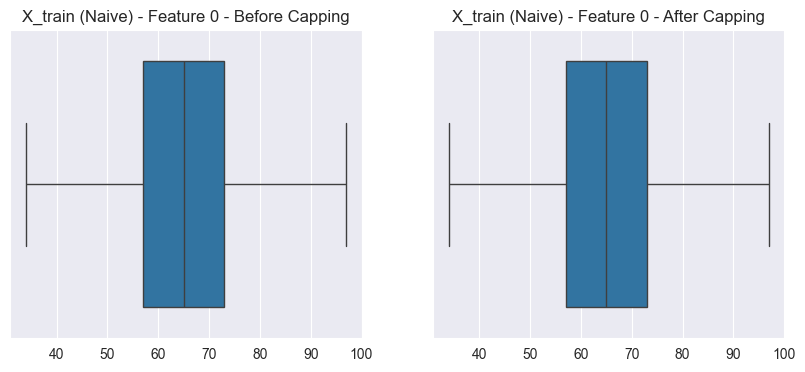

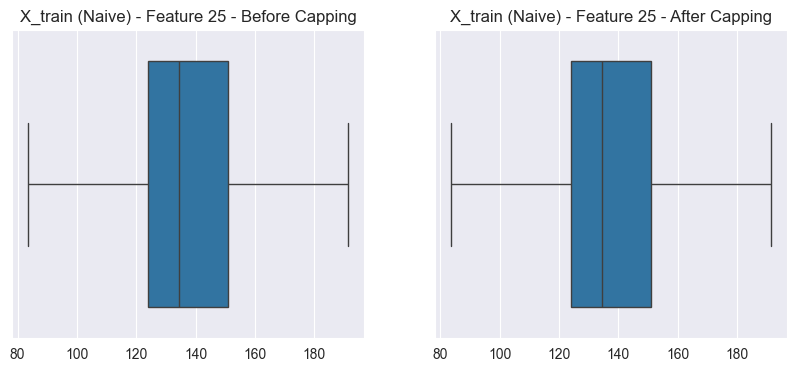

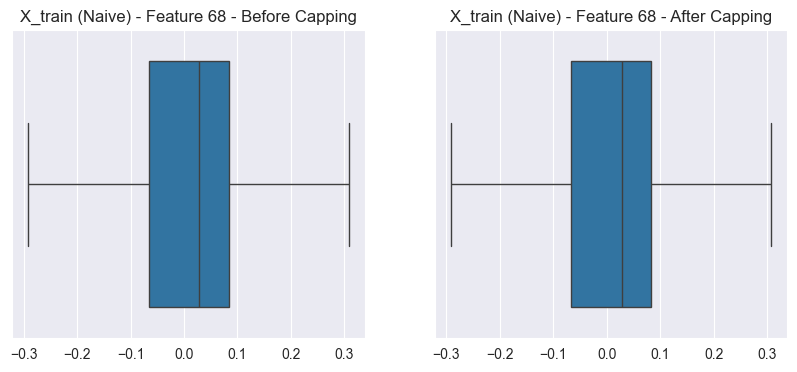

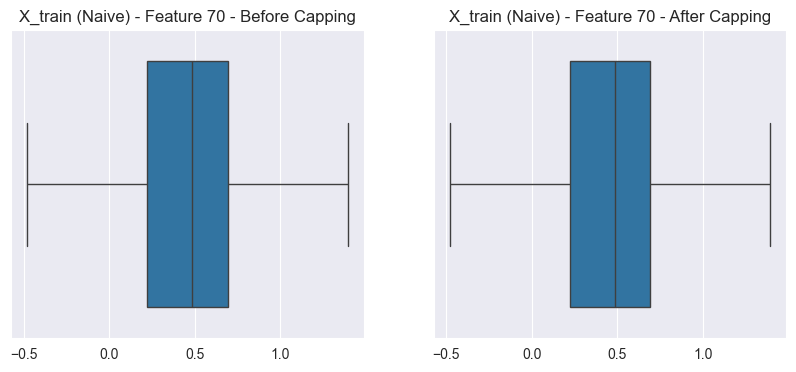

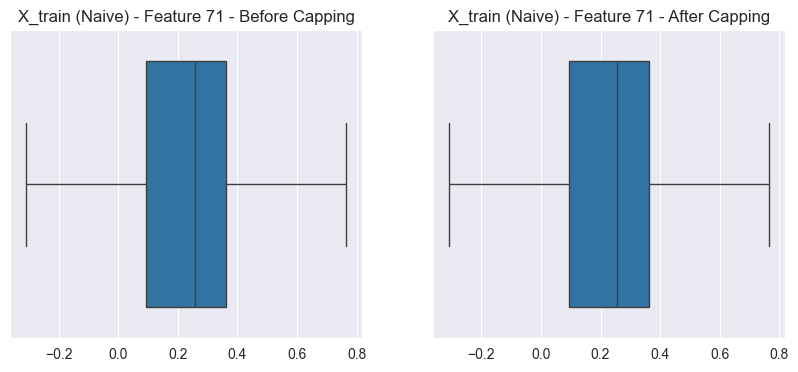

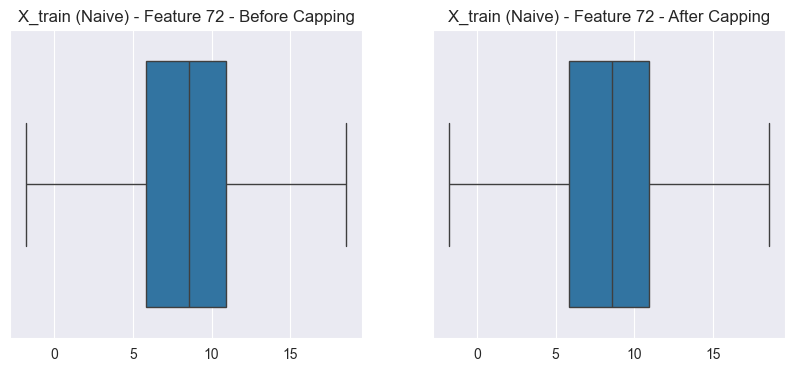

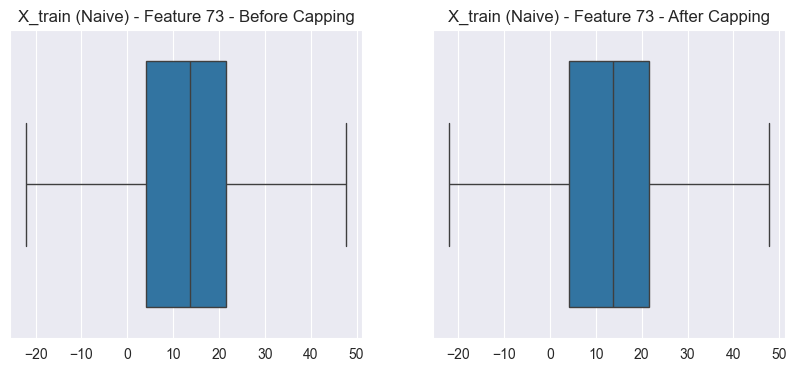

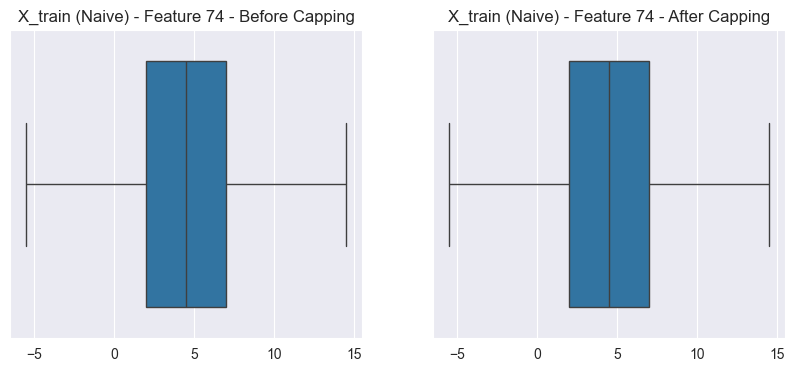

In [106]:
# Process outliers in the training set after filling missing values using naive methods
X_train_filled_naive_processed, reports_naive = process_outliers(X_train_filled_naive, 'X_train (Naive)')

In [107]:
# Report on the processed features after filling missing values using naive methods
for feature_index, report in reports_naive.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 0, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 68: {'outlier_count': 0, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 0, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 0, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 0, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 0, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 0, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [ ]:
# Save the processed training set after filling missing values using naive methods
np.save('../dataset/X_train_filled_naive_processed.npy', X_train_filled_naive_processed)

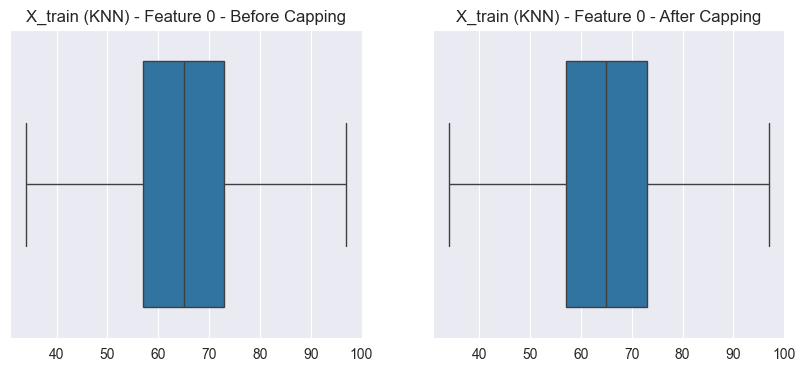

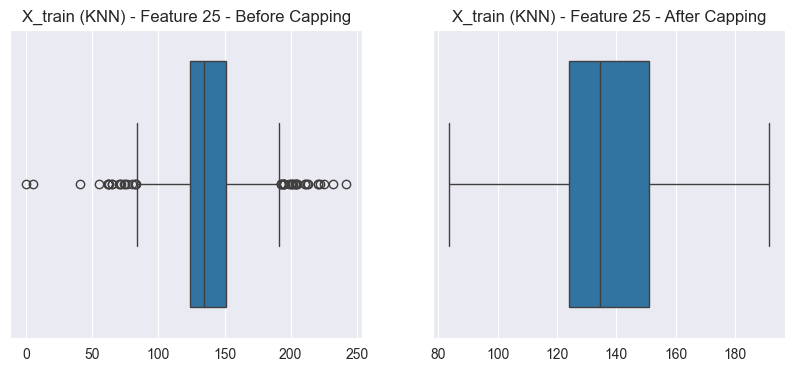

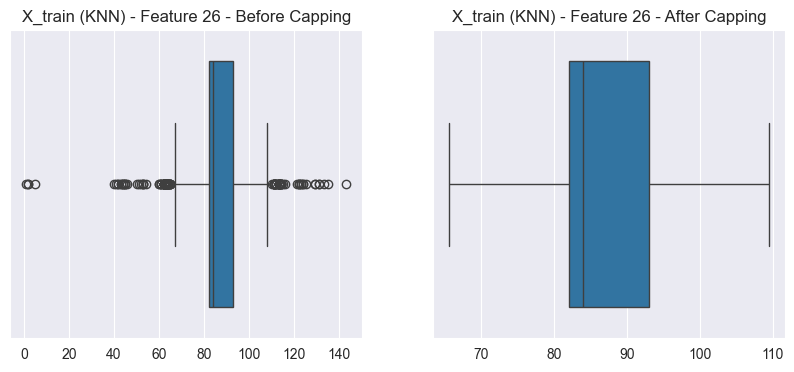

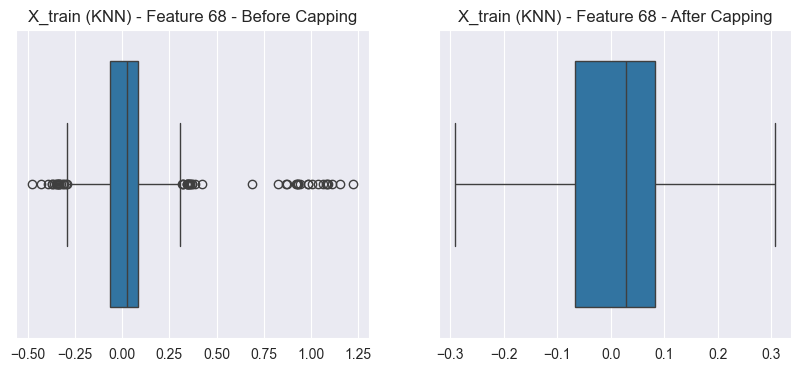

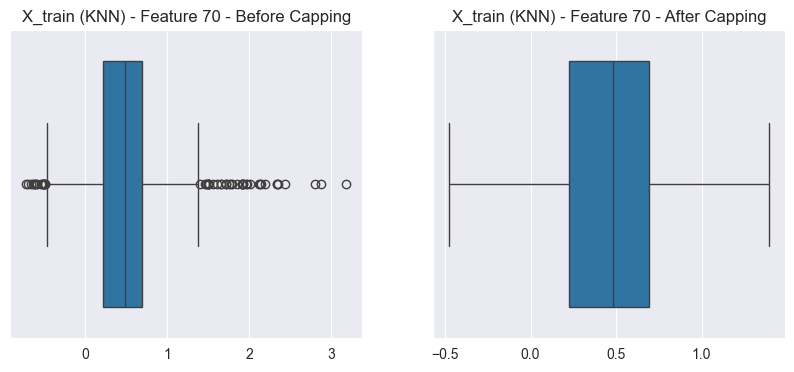

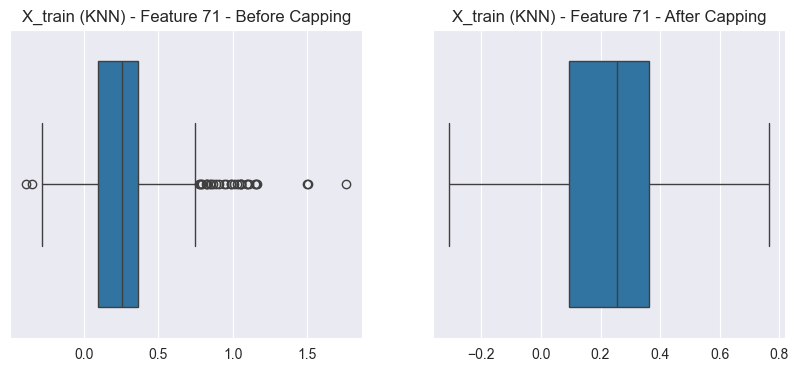

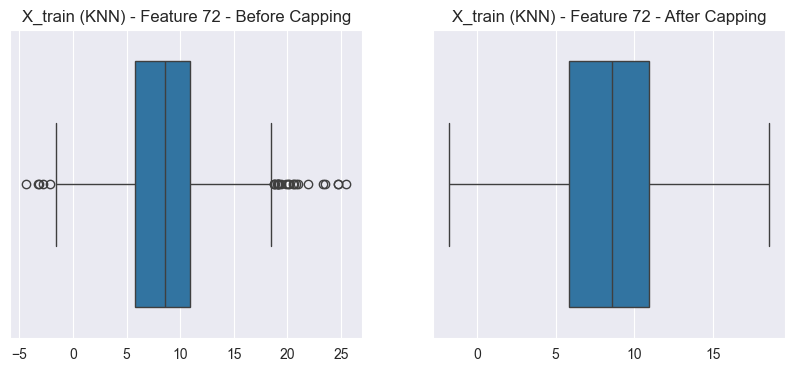

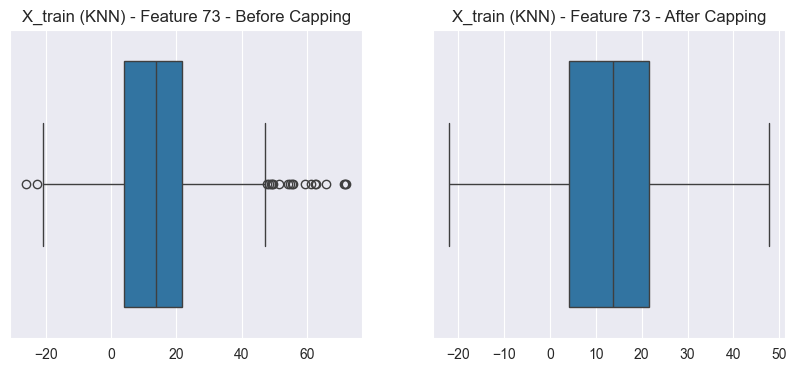

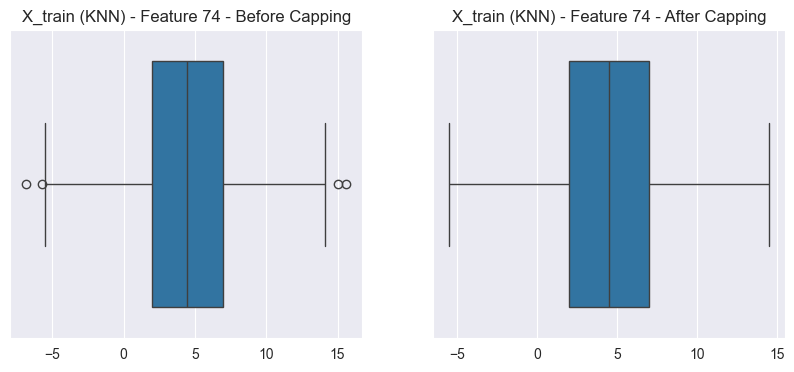

In [108]:
# Process outliers in the training set after filling missing values using KNN imputation
X_train_filled_knn_processed, reports_knn = process_outliers(X_train_filled_knn, 'X_train (KNN)')

In [109]:
# Report on the processed features after filling missing values using KNN imputation
for feature_index, report in reports_knn.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [112]:
# Save the processed training set after filling missing values using KNN imputation
np.save('../dataset/X_train_filled_knn_processed.npy', X_train_filled_knn_processed)

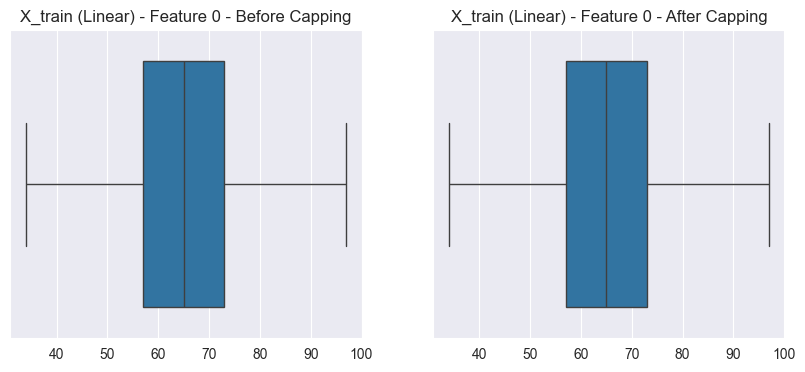

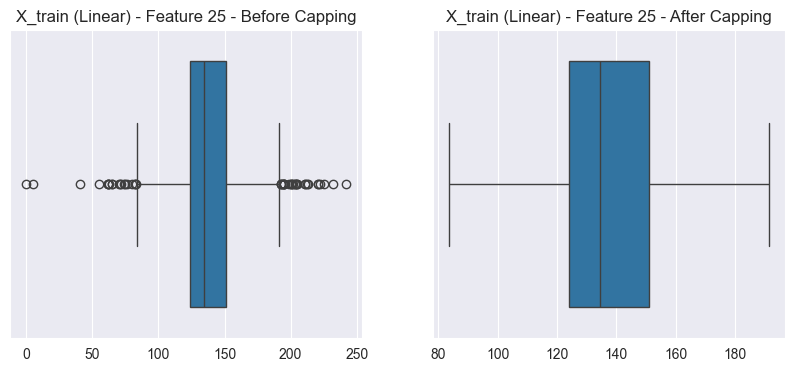

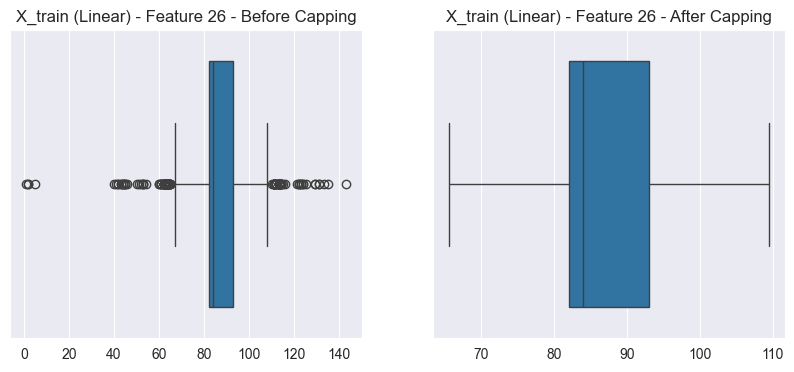

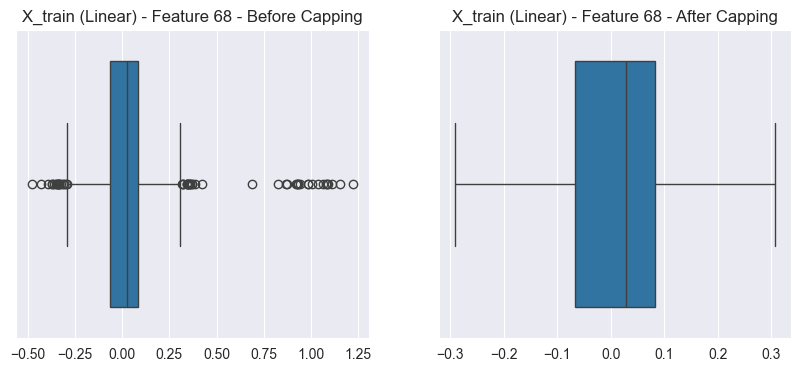

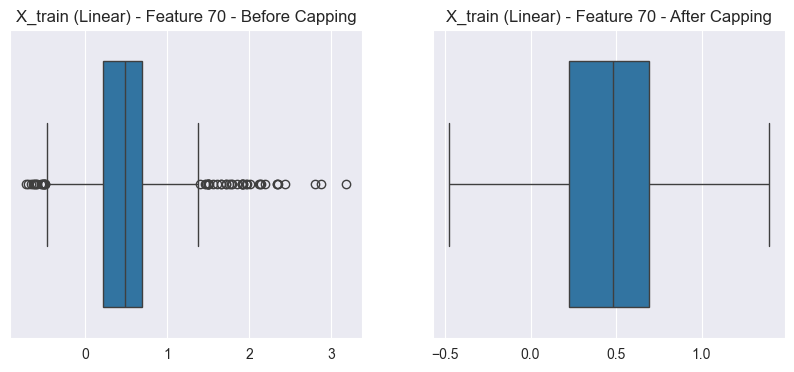

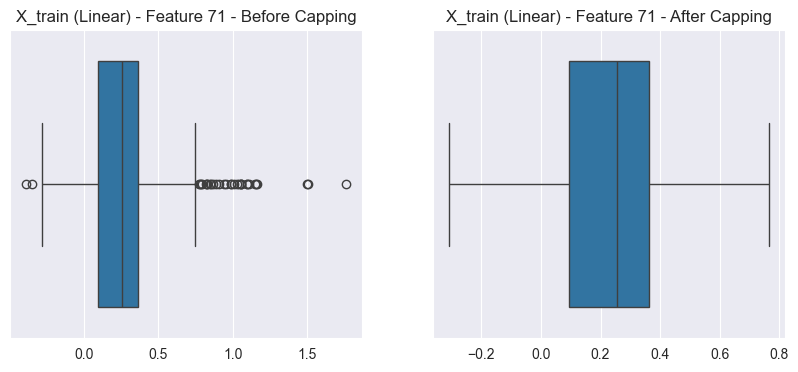

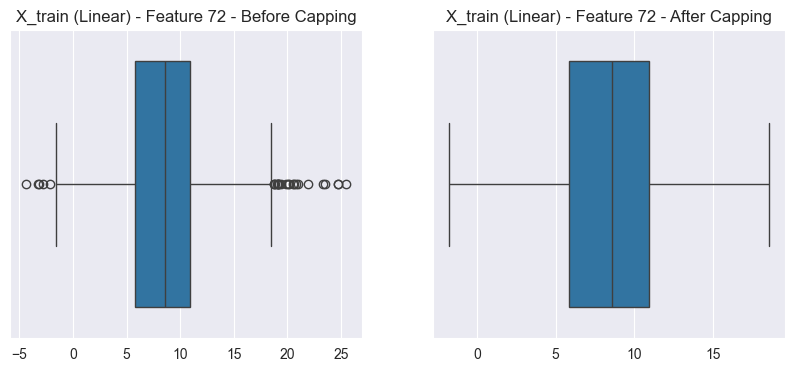

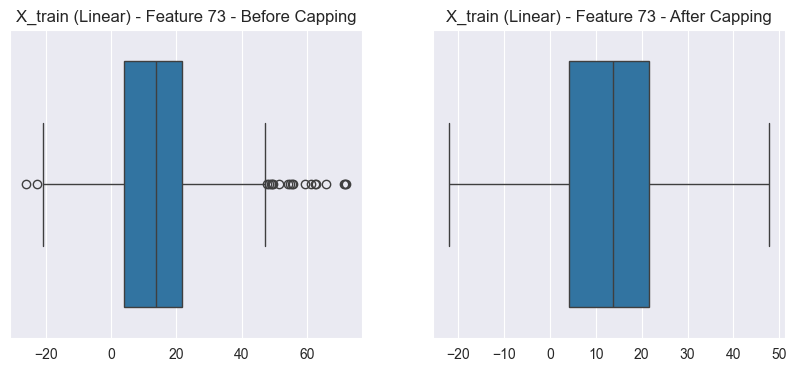

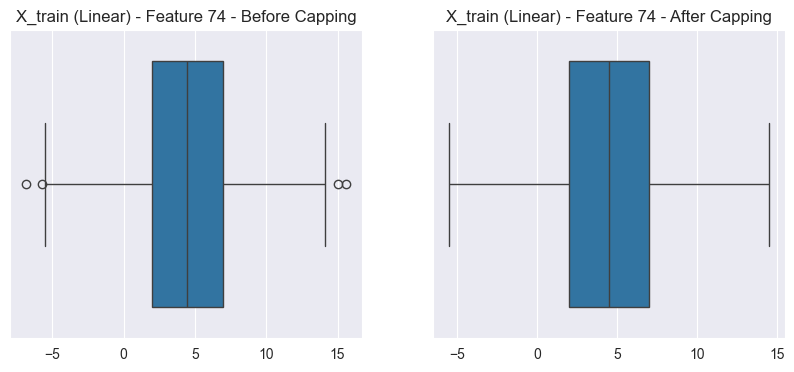

In [113]:
# Process outliers in the training set after filling missing values using linear regression imputation
X_train_filled_linear_processed, reports_linear = process_outliers(X_train_filled_linear, 'X_train (Linear)')

In [114]:
# Report on the processed features after filling missing values using linear regression imputation
for feature_index, report in reports_linear.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [115]:
# Save the processed training set after filling missing values using linear regression imputation
np.save('../dataset/X_train_filled_linear_processed.npy', X_train_filled_linear_processed)

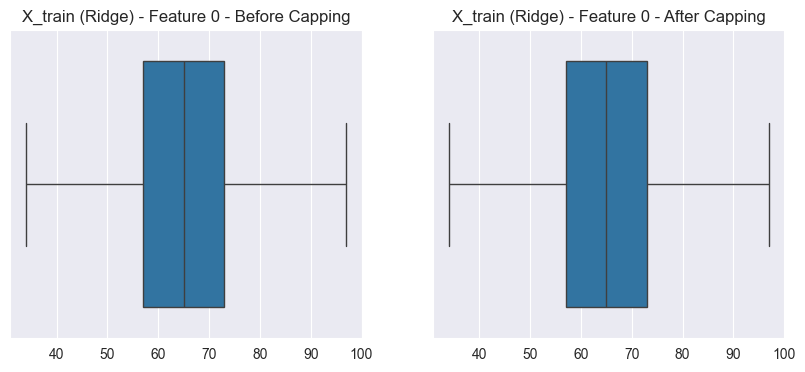

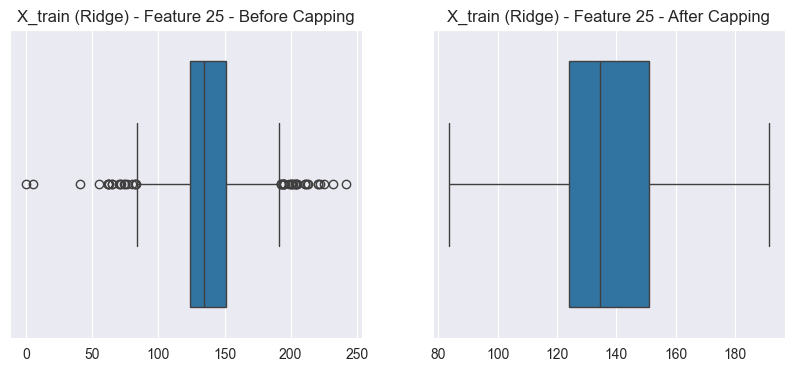

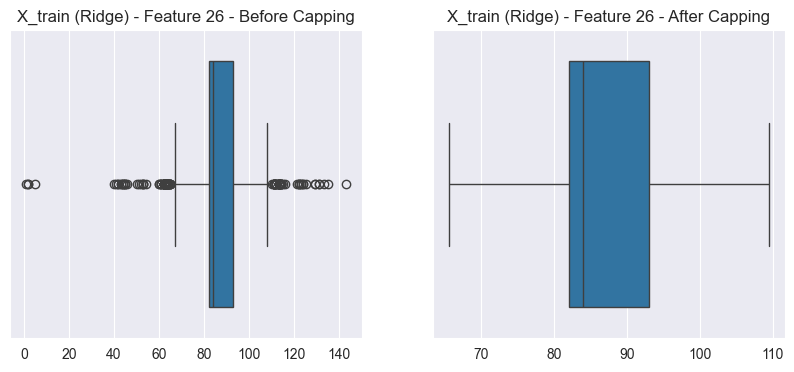

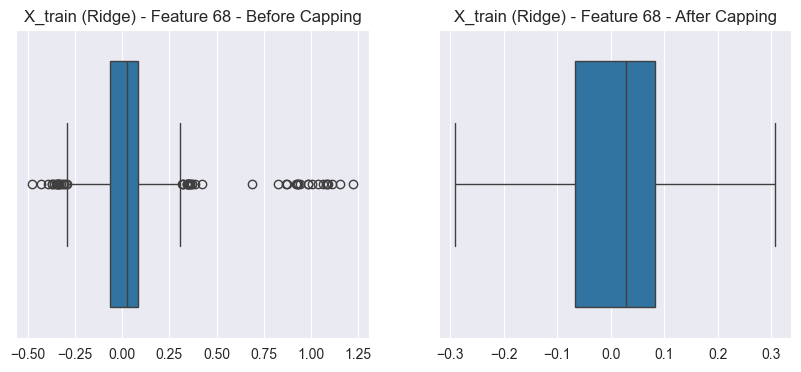

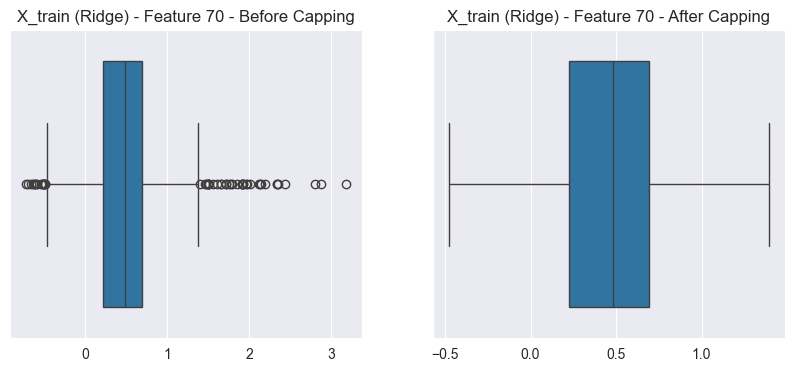

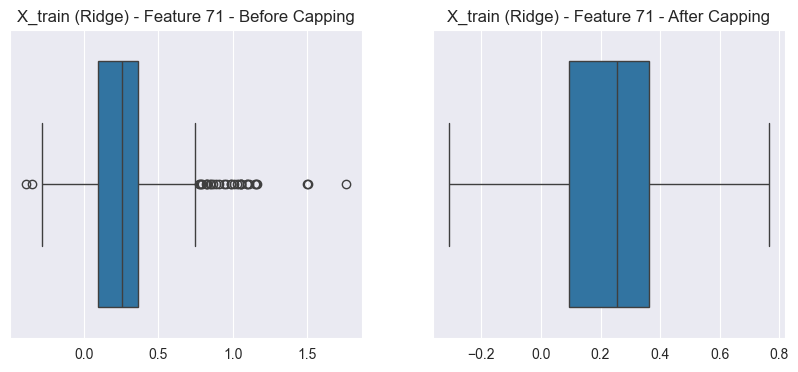

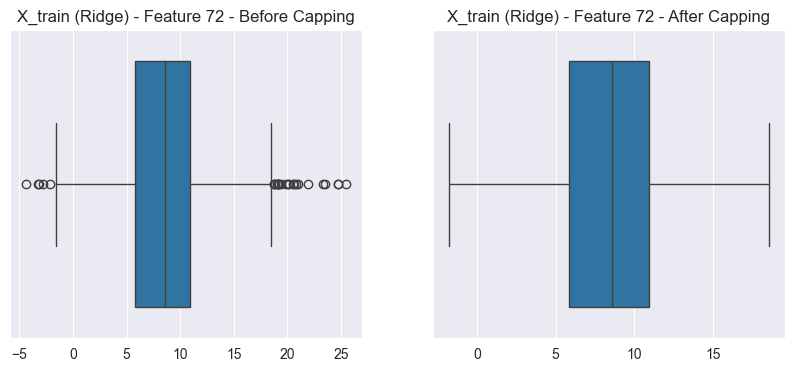

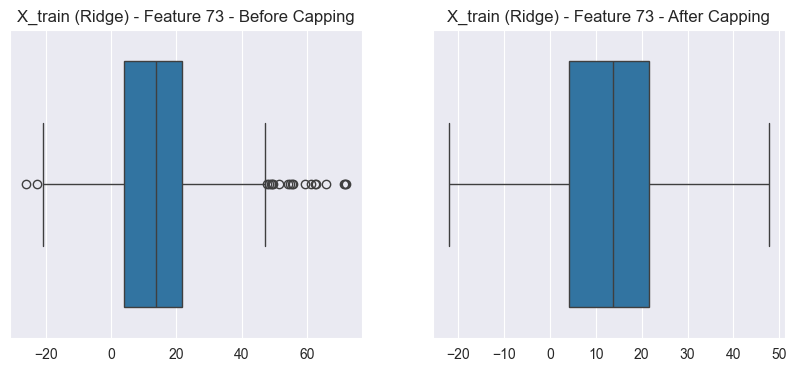

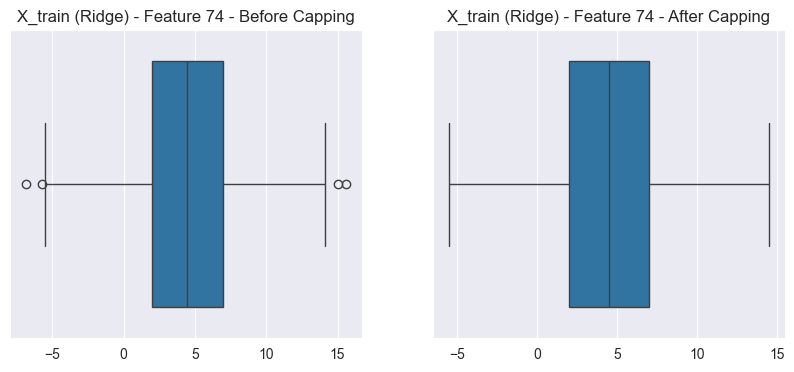

In [116]:
# Process outliers in the training set after filling missing values using ridge regression imputation
X_train_filled_ridge_processed, reports_ridge = process_outliers(X_train_filled_ridge, 'X_train (Ridge)')

In [117]:
# Report on the processed features after filling missing values using ridge regression imputation
for feature_index, report in reports_ridge.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [118]:
# Save the processed training set after filling missing values using ridge regression imputation
np.save('../dataset/X_train_filled_ridge_processed.npy', X_train_filled_ridge_processed)

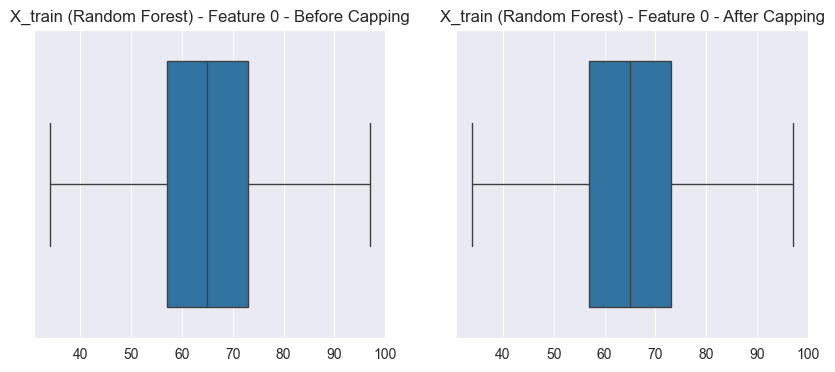

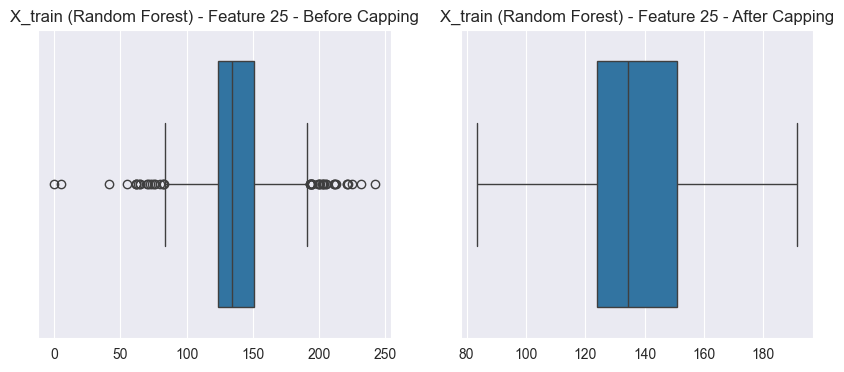

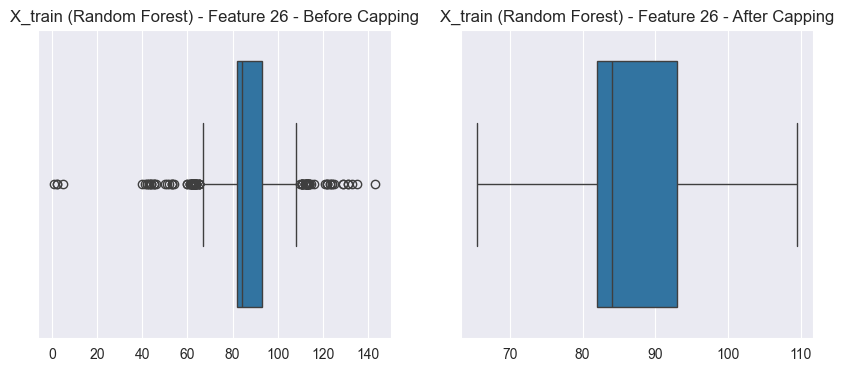

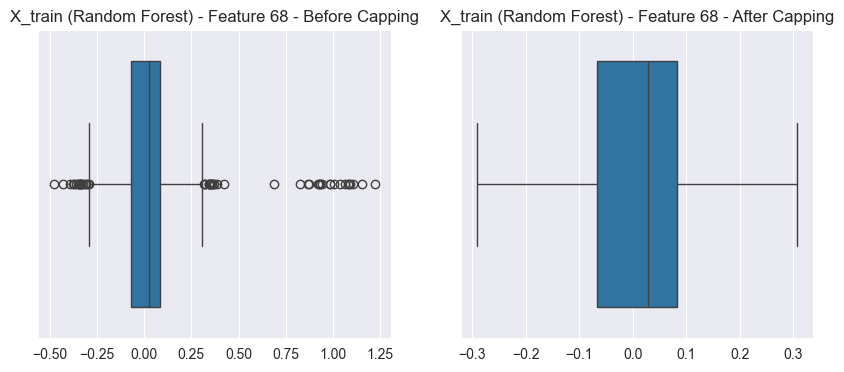

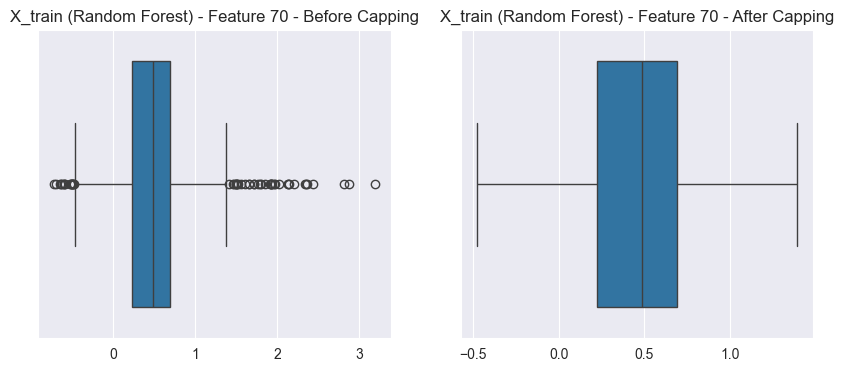

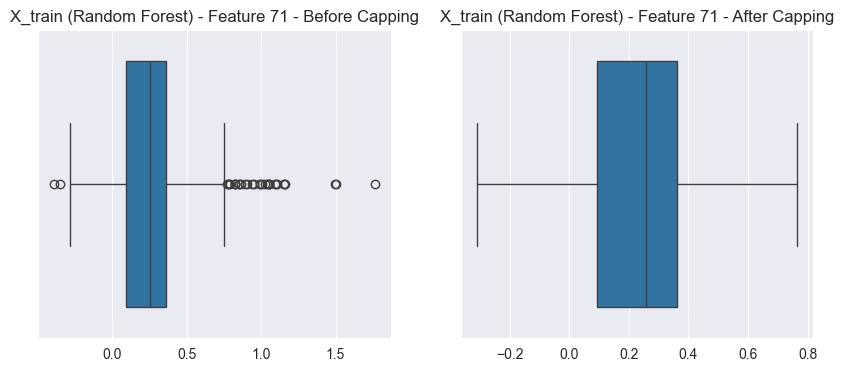

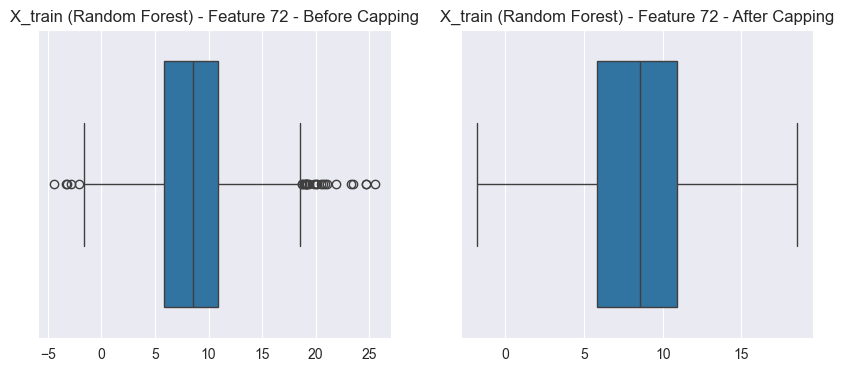

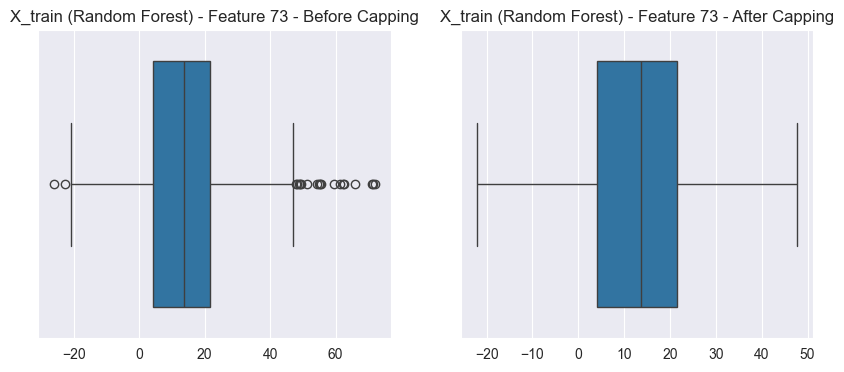

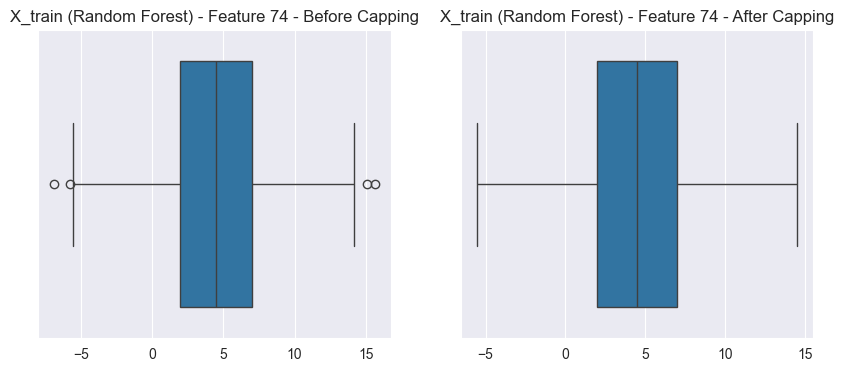

In [119]:
# Process outliers in the training set after filling missing values using random forest imputation
X_train_filled_rf_processed, reports_rf = process_outliers(X_train_filled_rf, 'X_train (Random Forest)')

In [120]:
# Report on the processed features after filling missing values using random forest imputation
for feature_index, report in reports_rf.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [121]:
# Save the processed training set after filling missing values using random forest imputation
np.save('../dataset/X_train_filled_rf_processed.npy', X_train_filled_rf_processed)

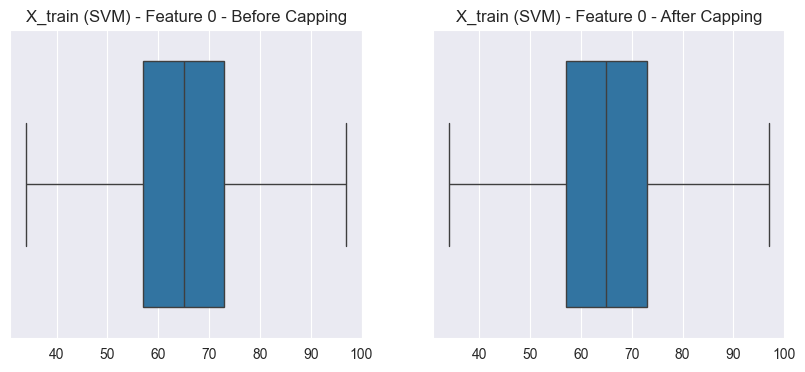

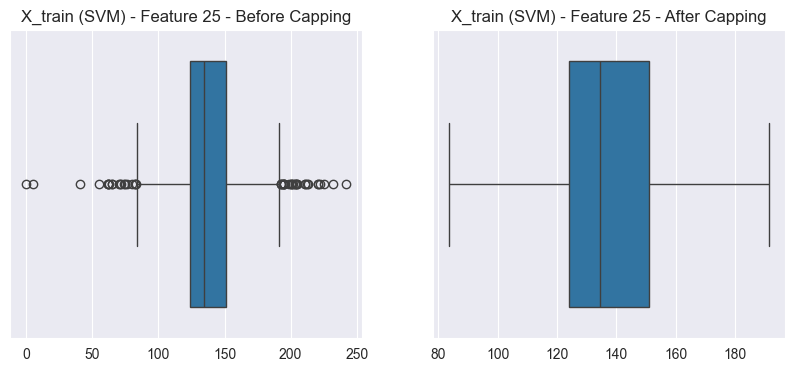

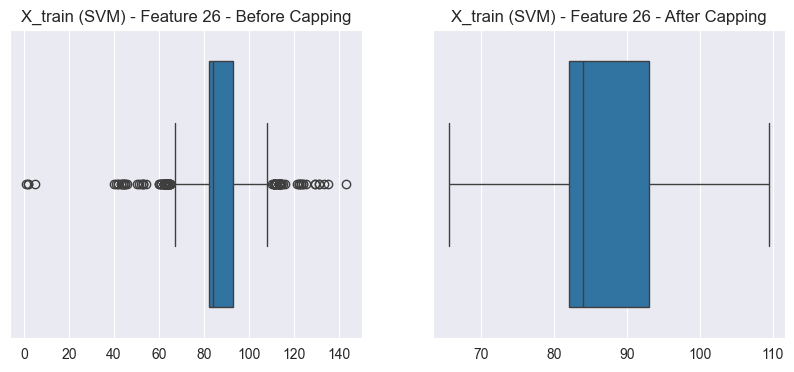

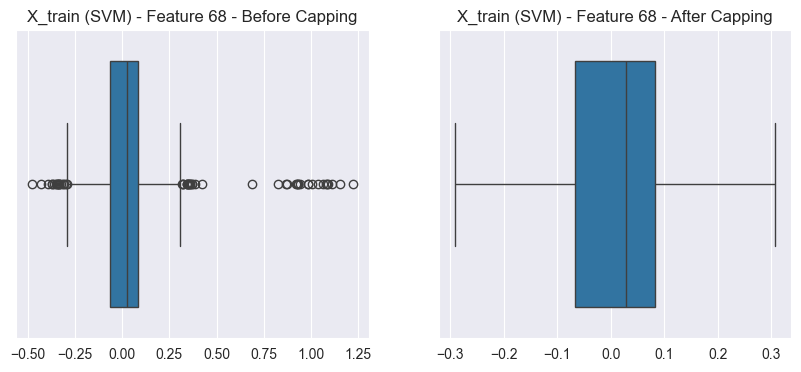

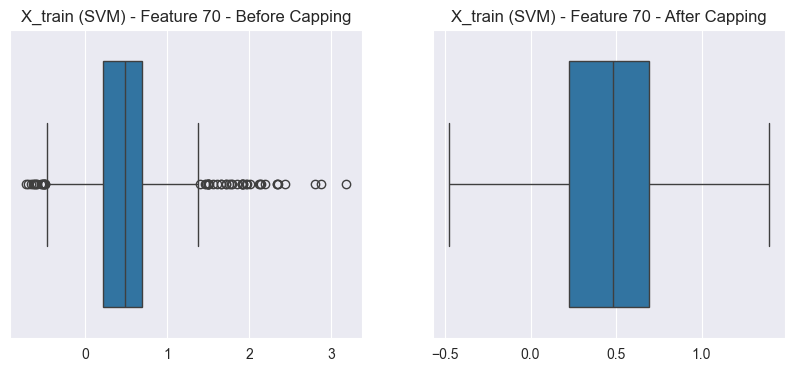

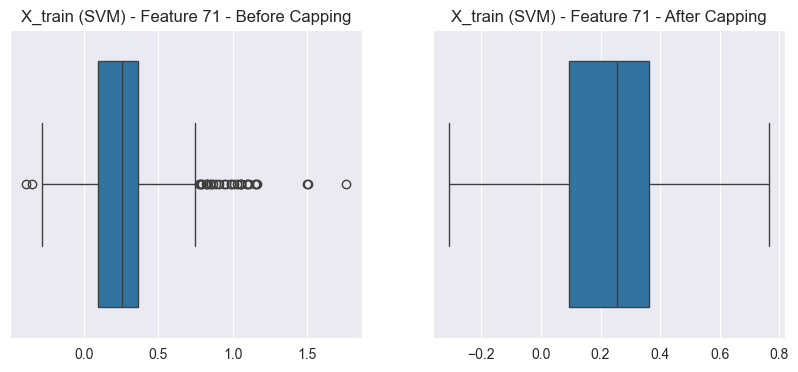

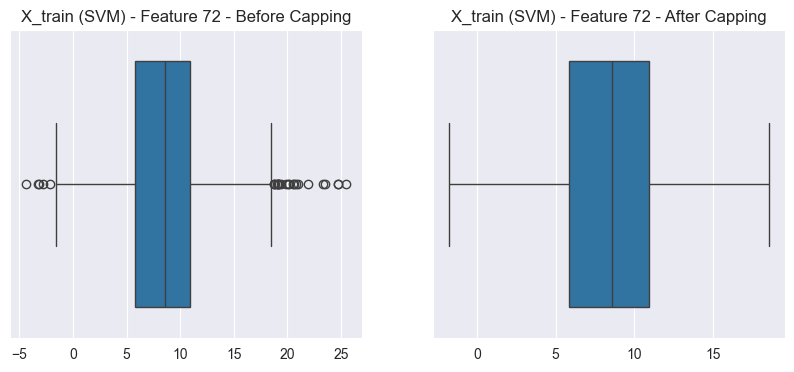

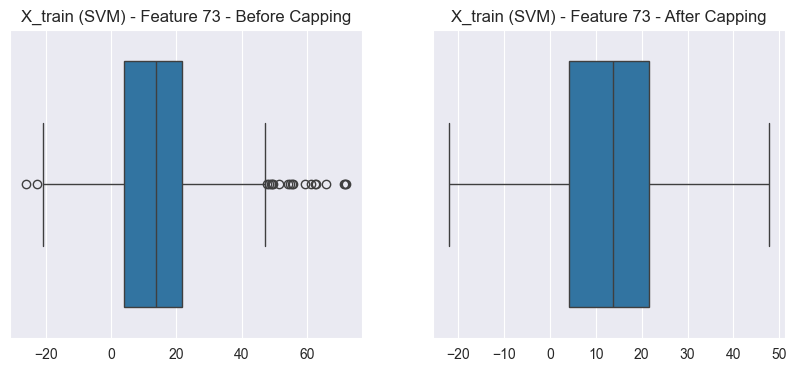

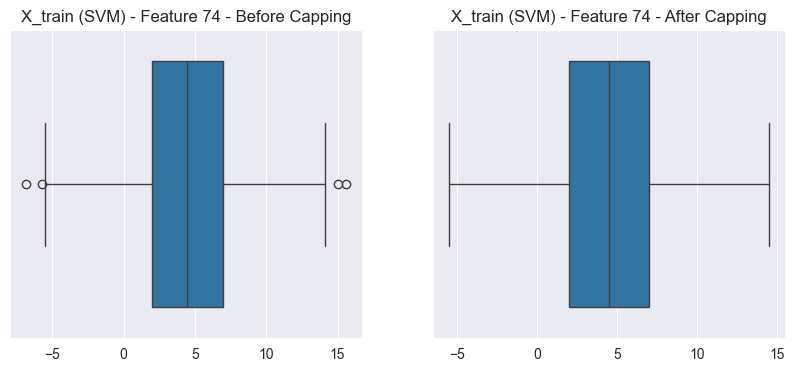

In [122]:
# Process outliers in the training set after filling missing values using support vector machine imputation
X_train_filled_svm_processed, reports_svm = process_outliers(X_train_filled_svm, 'X_train (SVM)')

In [123]:
# Report on the processed features after filling missing values using support vector machine imputation
for feature_index, report in reports_svm.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [124]:
# Save the processed training set after filling missing values using support vector machine imputation
np.save('../dataset/X_train_filled_svm_processed.npy', X_train_filled_svm_processed)

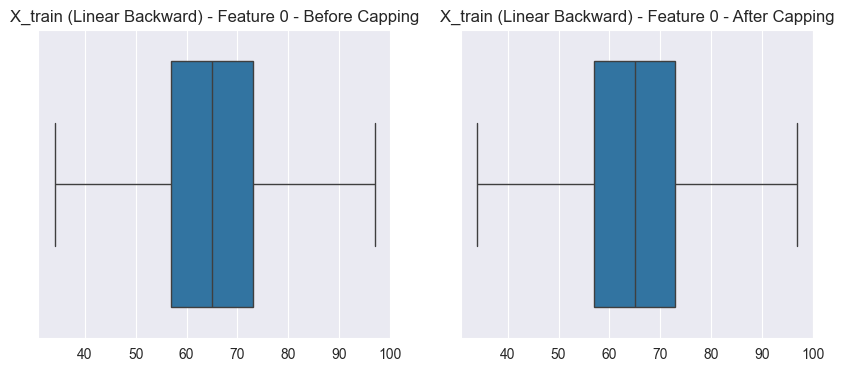

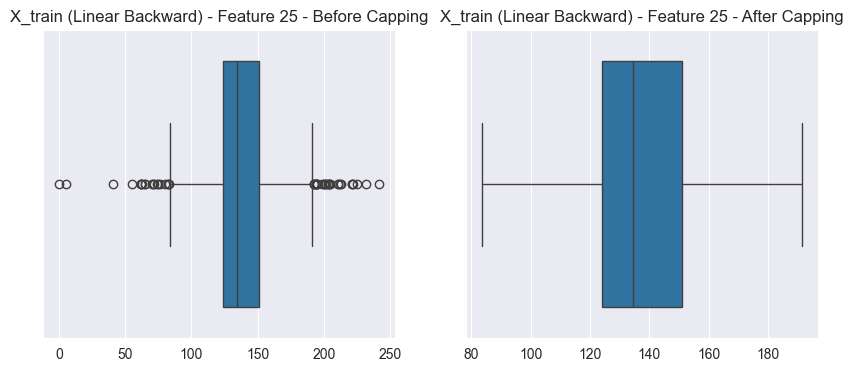

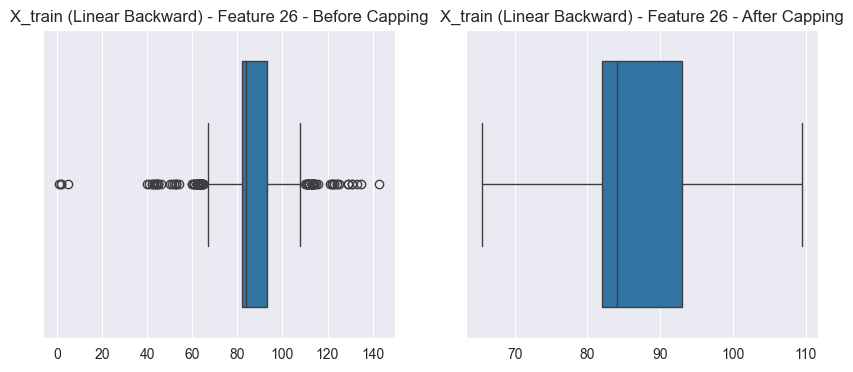

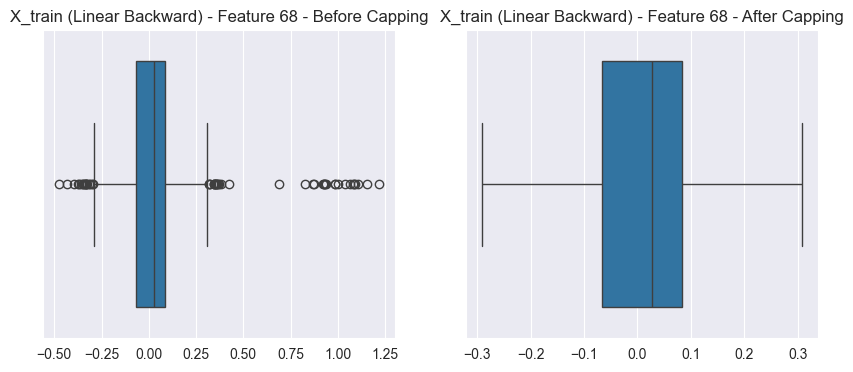

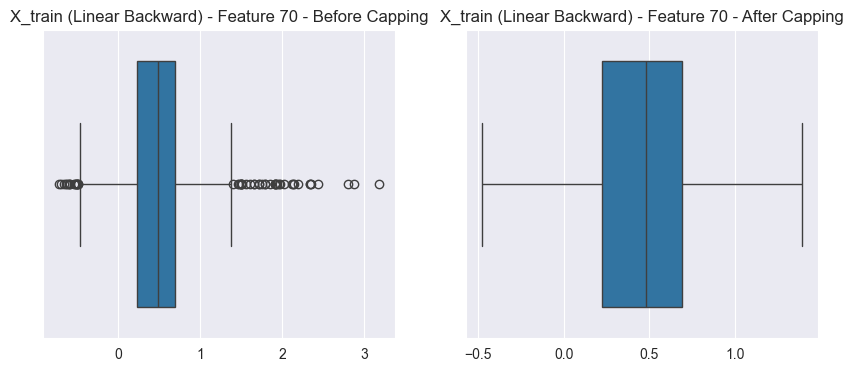

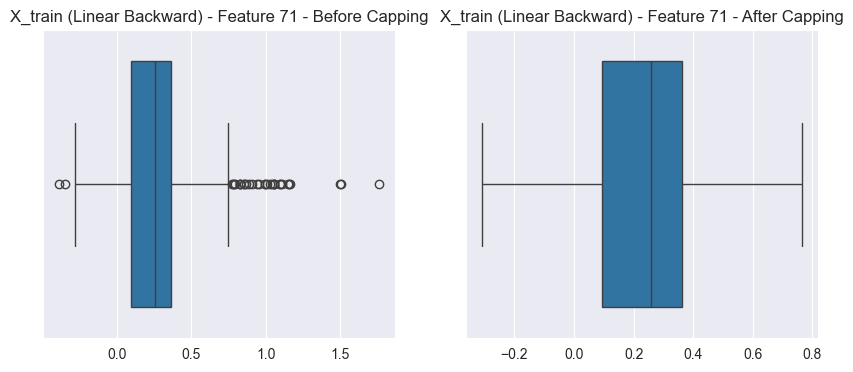

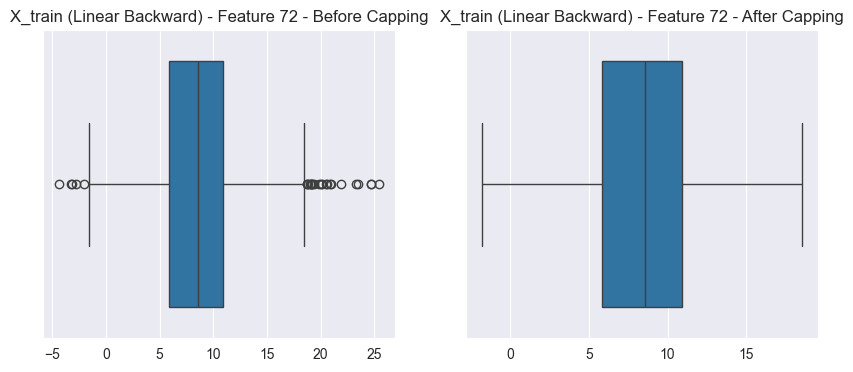

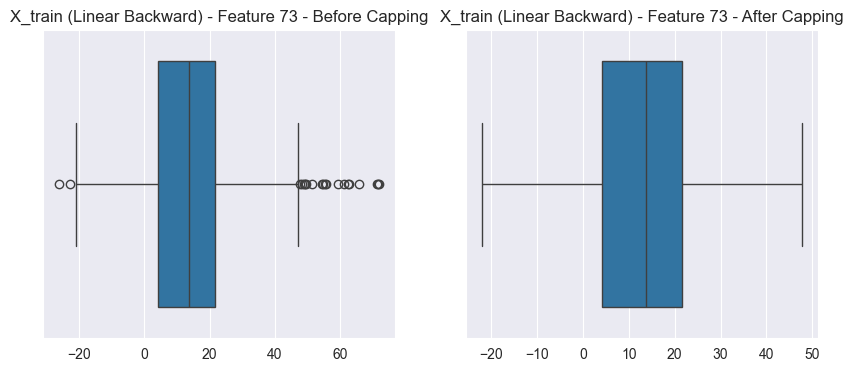

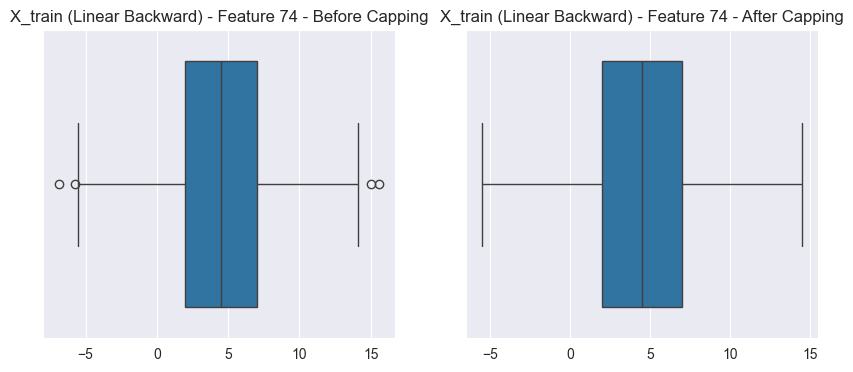

In [125]:
# Process outliers in the training set after filling missing values using linear regression imputation with target
X_train_filled_linear_backward_processed, reports_linear_backward = process_outliers(X_train_filled_linear_backward,
                                                                                     'X_train (Linear Backward)')

In [126]:
# Report on the processed features after filling missing values using linear regression imputation with target
for feature_index, report in reports_linear_backward.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [127]:
# Save the processed training set after filling missing values using linear regression imputation with target
np.save('../dataset/X_train_filled_linear_backward_processed.npy', X_train_filled_linear_backward_processed)

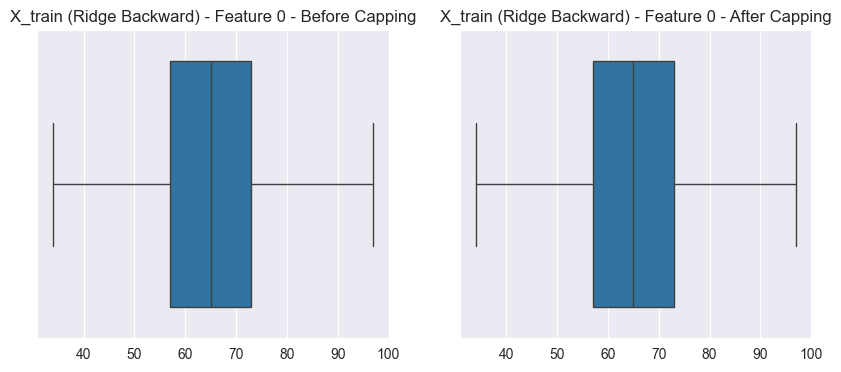

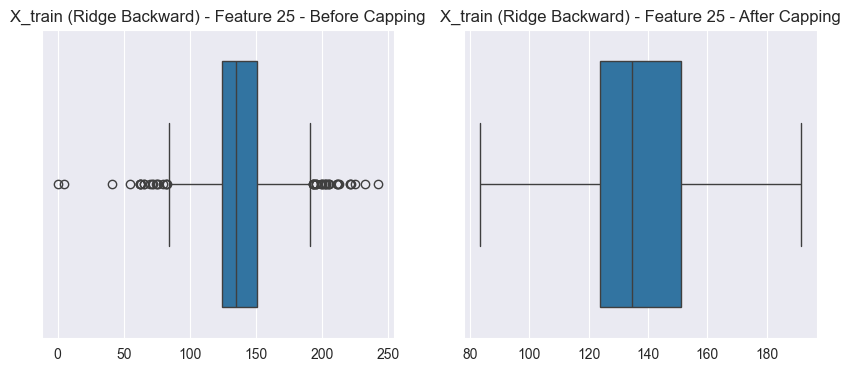

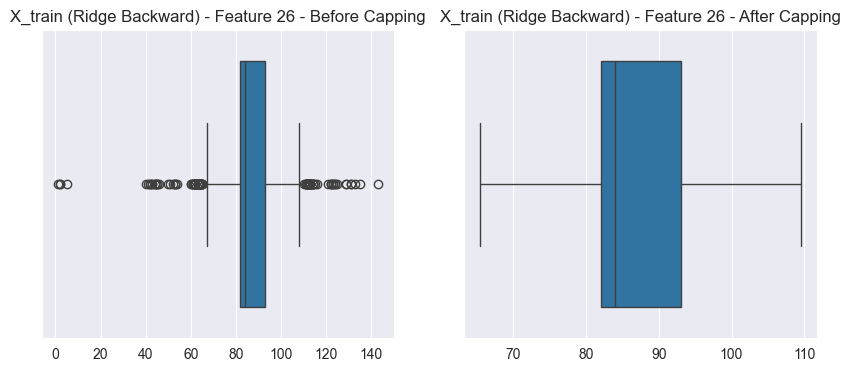

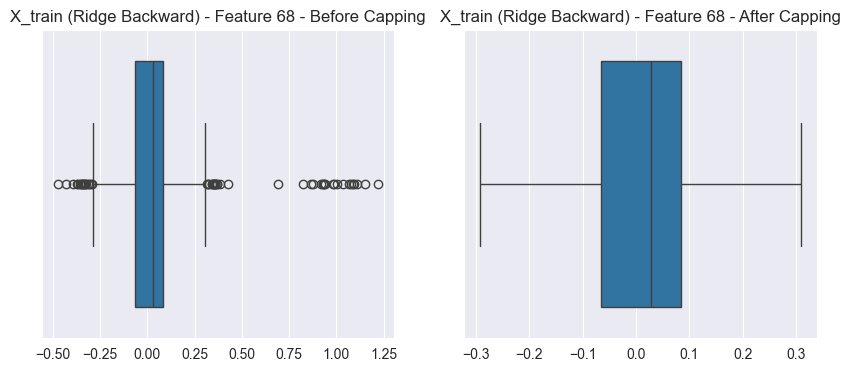

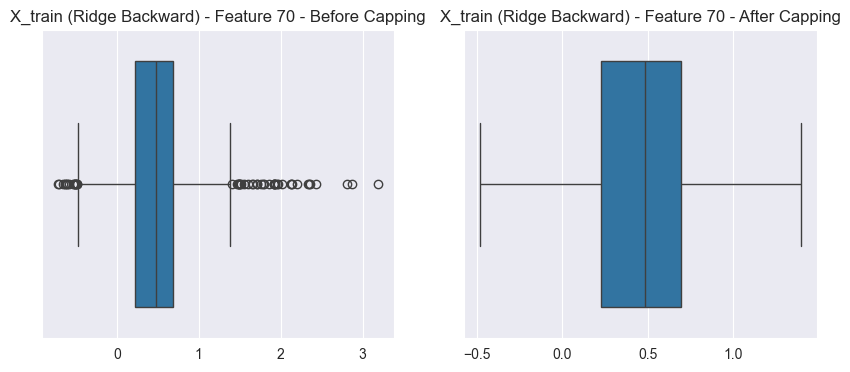

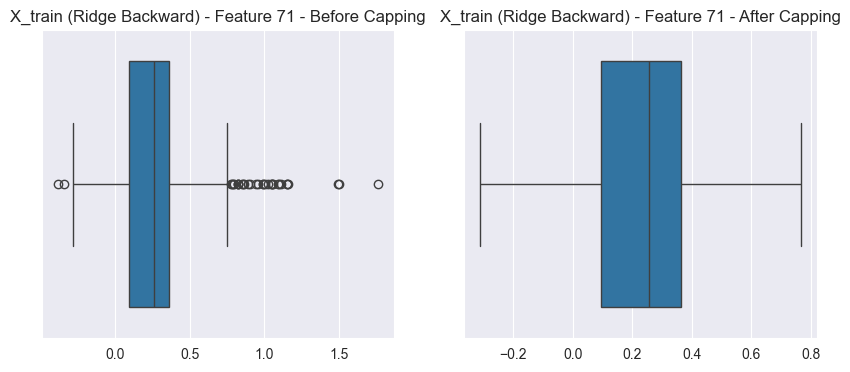

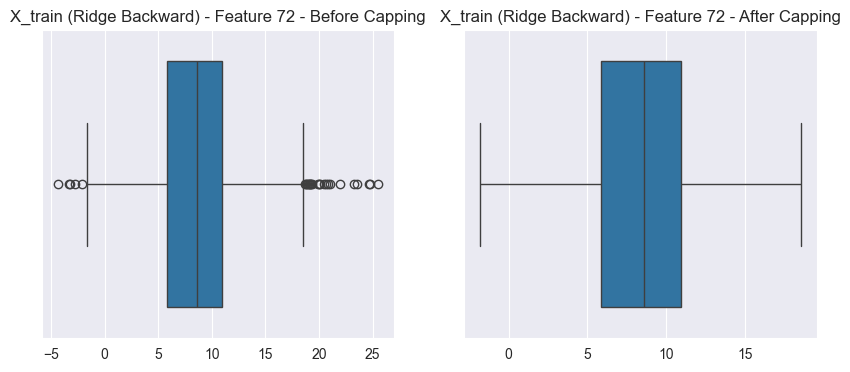

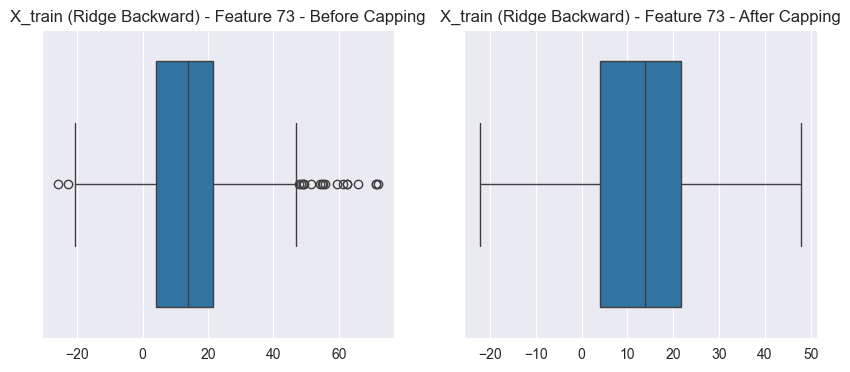

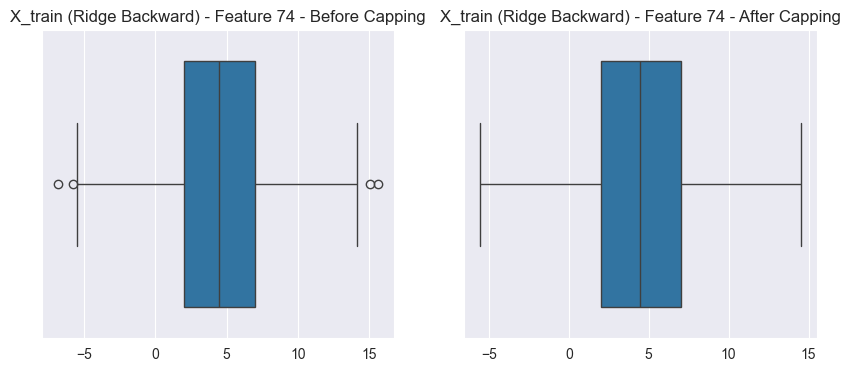

In [128]:
# Process outliers in the training set after filling missing values using ridge regression imputation with target
X_train_filled_ridge_backward_processed, reports_ridge_backward = process_outliers(X_train_filled_ridge_backward,
                                                                                   'X_train (Ridge Backward)')

In [129]:
# Report on the processed features after filling missing values using ridge regression imputation with target
for feature_index, report in reports_ridge_backward.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [130]:
# Save the processed training set after filling missing values using ridge regression imputation with target
np.save('../dataset/X_train_filled_ridge_backward_processed.npy', X_train_filled_ridge_backward_processed)

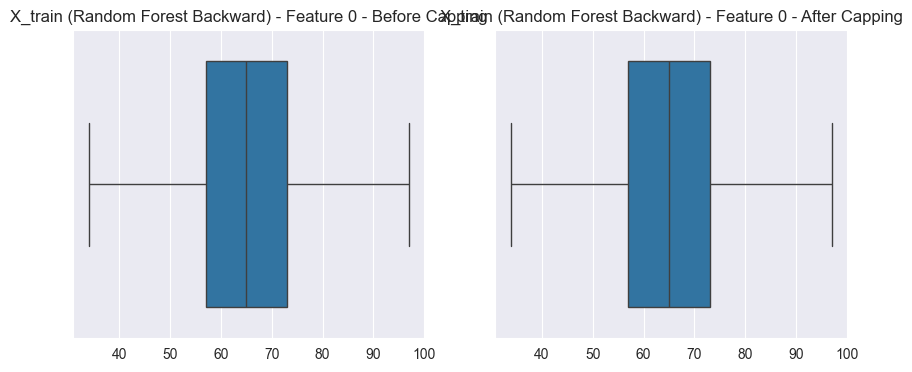

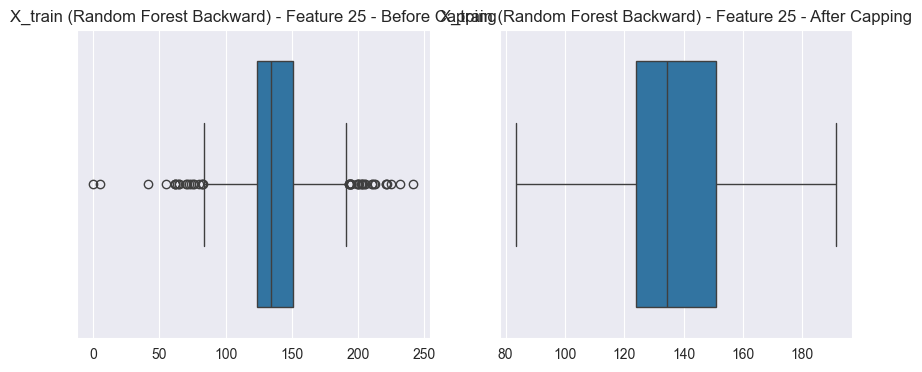

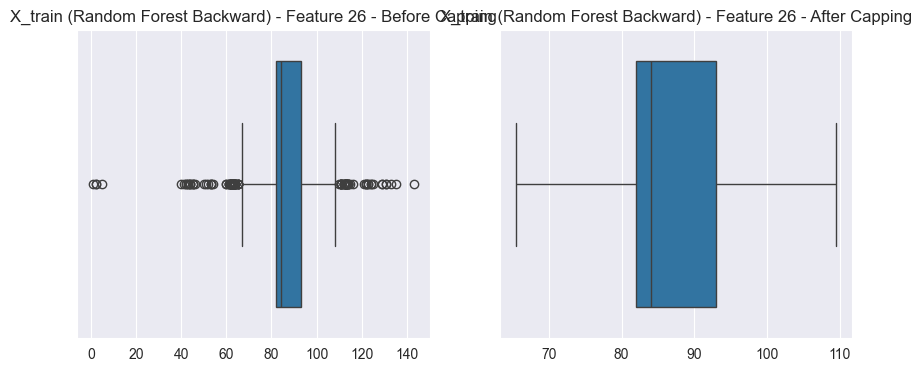

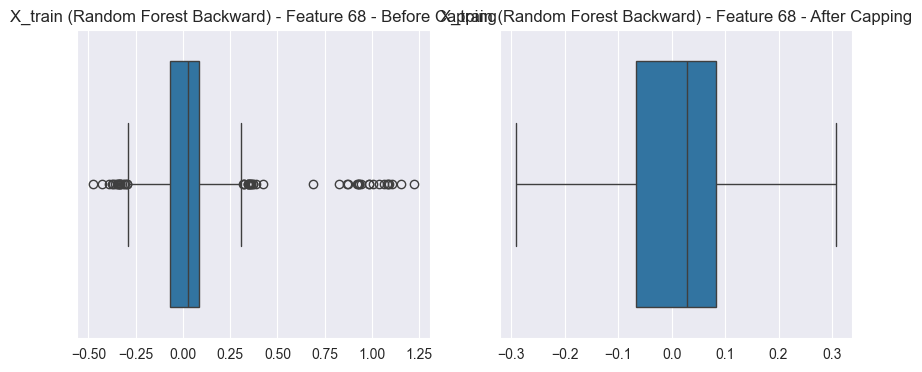

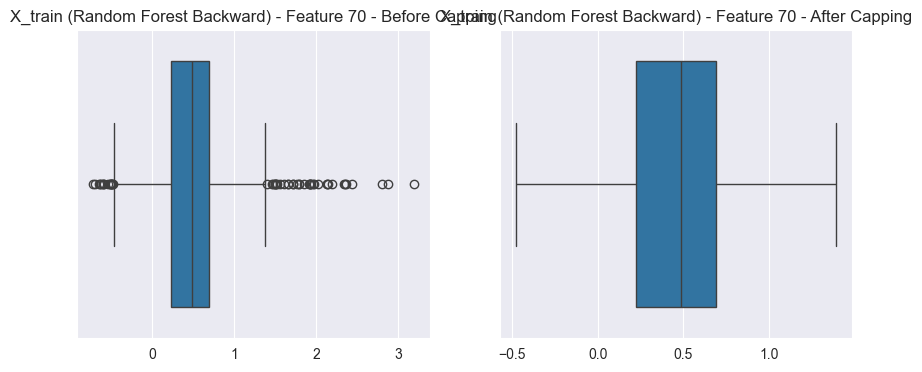

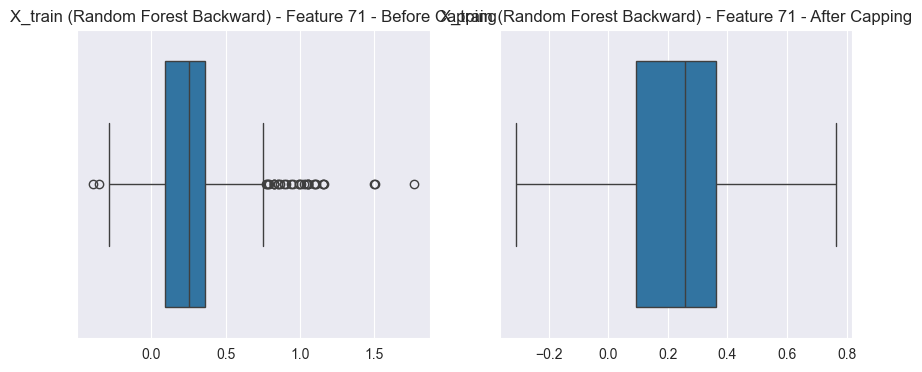

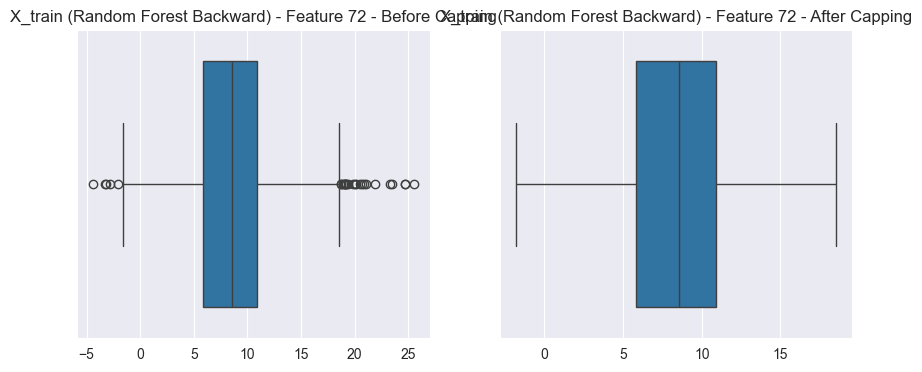

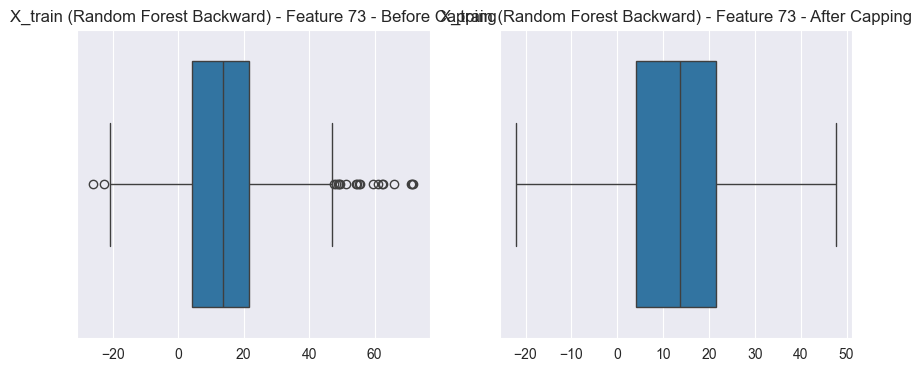

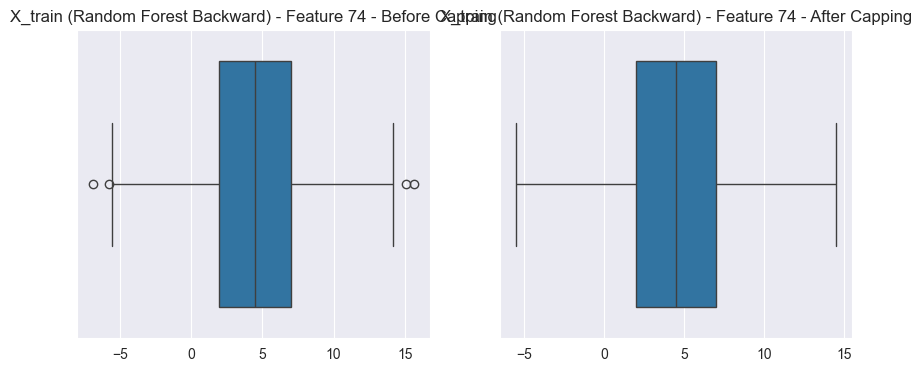

In [131]:
# Process outliers in the training set after filling missing values using random forest imputation with target
X_train_filled_rf_backward_processed, reports_rf_backward = process_outliers(X_train_filled_rf_backward,
                                                                             'X_train (Random Forest Backward)')

In [132]:
# Report on the processed features after filling missing values using random forest imputation with target
for feature_index, report in reports_rf_backward.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [133]:
# Save the processed training set after filling missing values using random forest imputation with target
np.save('../dataset/X_train_filled_rf_backward_processed.npy', X_train_filled_rf_backward_processed)

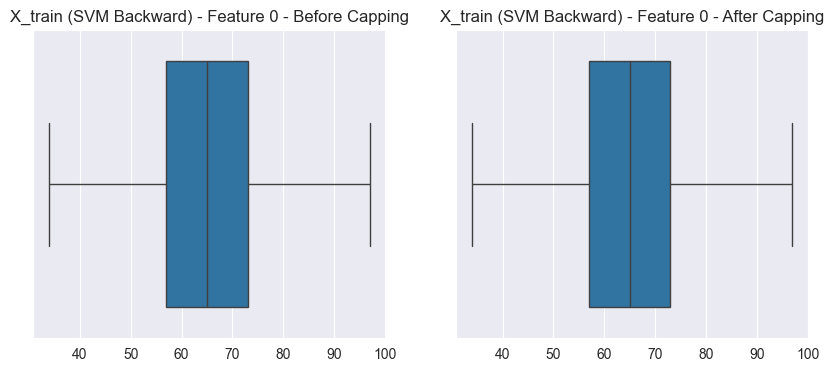

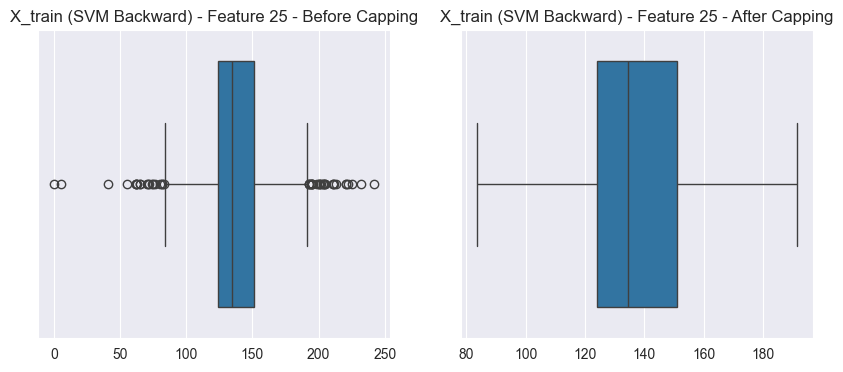

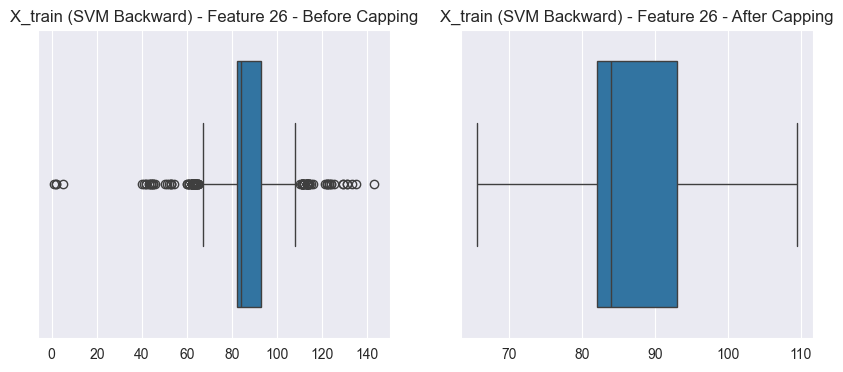

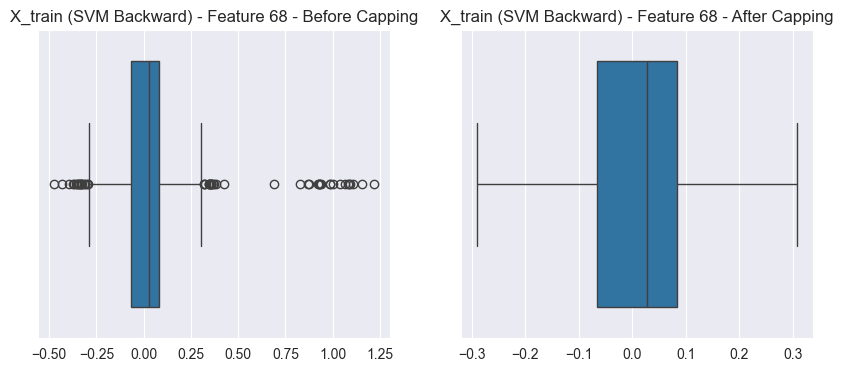

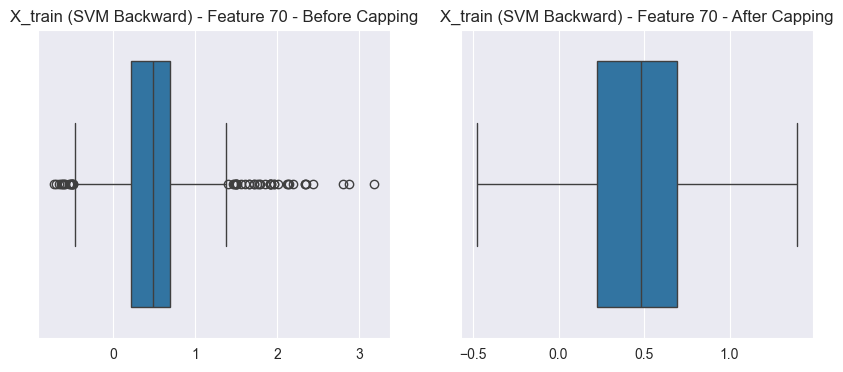

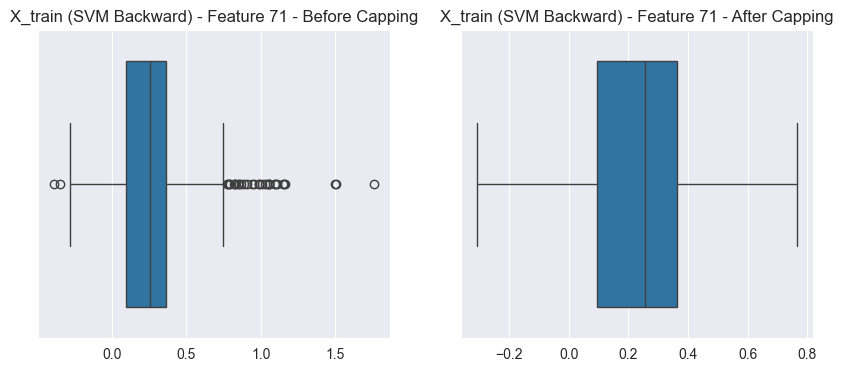

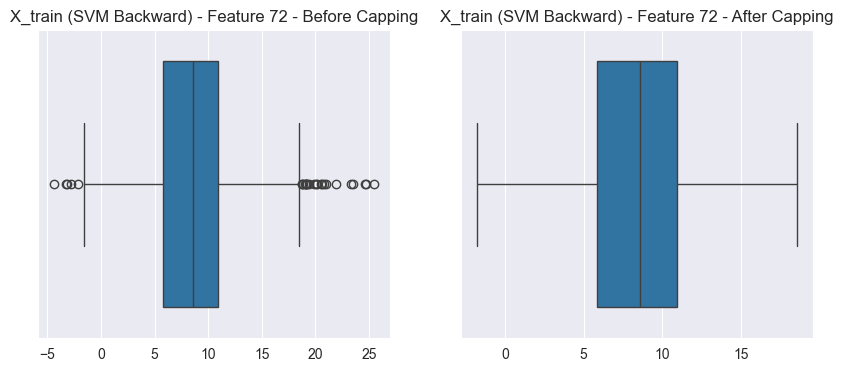

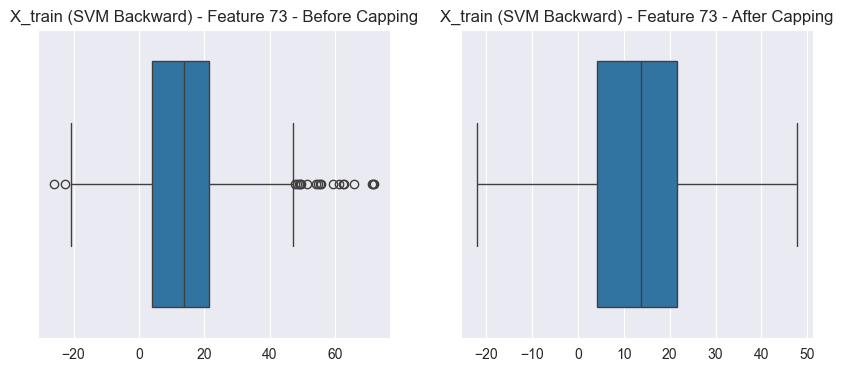

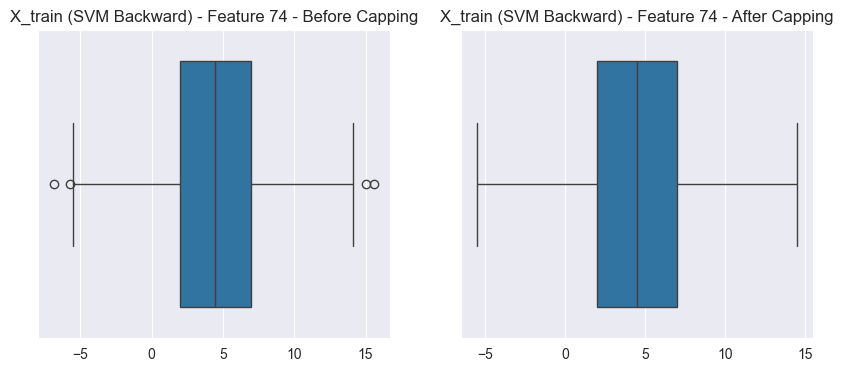

In [134]:
# Process outliers in the training set after filling missing values using support vector machine imputation with target
X_train_filled_svm_backward_processed, reports_svm_backward = process_outliers(X_train_filled_svm_backward,
                                                                               'X_train (SVM Backward)')

In [135]:
# Report on the processed features after filling missing values using support vector machine imputation with target
for feature_index, report in reports_svm_backward.items():
    print(f'Feature {feature_index}: {report}')

Feature 0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}
Feature 25: {'outlier_count': 48, 'lower_bound': 83.5, 'upper_bound': 191.5}
Feature 26: {'outlier_count': 111, 'lower_bound': 65.5, 'upper_bound': 109.5}
Feature 68: {'outlier_count': 53, 'lower_bound': -0.29127339036826744, 'upper_bound': 0.3081385383539019}
Feature 70: {'outlier_count': 53, 'lower_bound': -0.4783884321417583, 'upper_bound': 1.3942256331362768}
Feature 71: {'outlier_count': 33, 'lower_bound': -0.30926201248770935, 'upper_bound': 0.7653722180005614}
Feature 72: {'outlier_count': 27, 'lower_bound': -1.7979101029328524, 'upper_bound': 18.55123880864035}
Feature 73: {'outlier_count': 20, 'lower_bound': -22.083574243054002, 'upper_bound': 47.74997024885272}
Feature 74: {'outlier_count': 4, 'lower_bound': -5.52716353796126, 'upper_bound': 14.50851944521262}


In [136]:
# Save the processed training set after filling missing values using support vector machine imputation with target
np.save('../dataset/X_train_filled_svm_backward_processed.npy', X_train_filled_svm_backward_processed)

In [137]:
# Check the shape of the processed training set after outlier processing
print('Shape of the processed training set after outlier processing:')
print('\tX_train_filled_naive_processed shape:', X_train_filled_naive_processed.shape)
print('\tX_train_filled_knn_processed shape:', X_train_filled_knn_processed.shape)
print('\tX_train_filled_linear_processed shape:', X_train_filled_linear_processed.shape)
print('\tX_train_filled_ridge_processed shape:', X_train_filled_ridge_processed.shape)
print('\tX_train_filled_rf_processed shape:', X_train_filled_rf_processed.shape)
print('\tX_train_filled_svm_processed shape:', X_train_filled_svm_processed.shape)
print('\tX_train_filled_linear_backward_processed shape:', X_train_filled_linear_backward_processed.shape)
print('\tX_train_filled_ridge_backward_processed shape:', X_train_filled_ridge_backward_processed.shape)
print('\tX_train_filled_rf_backward_processed shape:', X_train_filled_rf_backward_processed.shape)
print('\tX_train_filled_svm_backward_processed shape:', X_train_filled_svm_backward_processed.shape)

Shape of the processed training set after outlier processing:
	X_train_filled_naive_processed shape: (913, 95)
	X_train_filled_knn_processed shape: (913, 95)
	X_train_filled_linear_processed shape: (913, 95)
	X_train_filled_ridge_processed shape: (913, 95)
	X_train_filled_rf_processed shape: (913, 95)
	X_train_filled_svm_processed shape: (913, 95)
	X_train_filled_linear_backward_processed shape: (913, 95)
	X_train_filled_ridge_backward_processed shape: (913, 95)
	X_train_filled_rf_backward_processed shape: (913, 95)
	X_train_filled_svm_backward_processed shape: (913, 95)


## 11. 特征选择

使用互信息分类分析特征，删除与标签不相关的特征。

## 11. Feature Selection

Analyze features using mutual information classification and remove irrelevant features that are not related to the labels.

In [139]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif


def process_features_for_label(x_data, y_data, label_index):
    """
    Analyze and process features based on the given label index.
    
    Parameters:
    - x_data: Feature dataset (numpy array)
    - y_data: Label dataset (numpy array)
    - label_index: Index of the label to be processed
    
    Returns:
    - x_data_relevant: Dataset with irrelevant features removed
    - relevant_features_indices: Indices of features relevant to the label
    - relevant_scores: Mutual information scores for relevant features
    - irrelevant_features_indices: Indices of features not relevant to the label
    """
    # Calculate mutual information scores between features and the specified label
    scores = mutual_info_classif(x_data, y_data[:, label_index])

    # Identify relevant and irrelevant features based on their scores
    relevant_features_info = [(i, score) for i, score in enumerate(scores) if score > 0]
    irrelevant_features_indices = [i for i, score in enumerate(scores) if score == 0]

    # Remove irrelevant features from the dataset
    relevant_features_indices = [i for i, _ in relevant_features_info]
    x_data_relevant = x_data[:, relevant_features_indices]

    # Return processed data and additional information
    relevant_scores = [score for _, score in relevant_features_info]
    return x_data_relevant, relevant_features_indices, relevant_scores, irrelevant_features_indices


def print_feature_information(relevant_features_info, irrelevant_features_indices, label_index):
    """
    Print information about relevant and irrelevant features for a specific label.
    
    Parameters:
    - relevant_features_info: List of tuples containing indices and scores of relevant features
    - irrelevant_features_indices: List of indices of irrelevant features
    - label_index: Index of the label being processed
    """
    print(f"Label {label_index + 1}:")
    print("Relevant features and their mutual information scores:")
    for i, score in relevant_features_info:
        print(f"Feature {i + 1}: {score:.4f}")  # Scores printed with 4 decimal places

    print(f"Total number of relevant features: {len(relevant_features_info)}\n")

    if irrelevant_features_indices:
        print("Indices of irrelevant features:")
        print([i + 1 for i in irrelevant_features_indices])  # Human-readable index (starting from 1)
        print(f"Total number of irrelevant features: {len(irrelevant_features_indices)}\n")
    else:
        print("There are no irrelevant features for this label.\n")



### 11.1 处理填充后的训练集

处理经不同策略填充后的训练集，删除与标签不相关的特征。

### 11.1 Process the Filled Training Sets

Process the training sets after filling with different strategies and remove irrelevant features that are not related to the labels.

In [140]:
import os
from concurrent.futures import ThreadPoolExecutor


def process_and_save_single_label(X_data, Y_data, label_index, save_path):
    """
    Process features for a single label, identify relevant features, and save them.
    
    Parameters:
    - X_data: The feature dataset after imputation
    - Y_data: The label dataset
    - label_index: The index of the label to process
    - save_path: Directory to save the relevant features for the label
    """
    X_relevant, relevant_indices, relevant_scores, irrelevant_indices = process_features_for_label(
        X_data, Y_data, label_index)

    print_feature_information(list(zip(relevant_indices, relevant_scores)), irrelevant_indices, label_index)

    label_save_path = os.path.join(save_path, f'X_train_relevant_label_{label_index}.npy')
    np.save(label_save_path, X_relevant)
    print(f'Saved relevant features for label {label_index} to {label_save_path}')


def process_and_save_relevant_features(X_data, Y_data, save_path):
    """
    Use threading to process each label in the label dataset concurrently.
    
    Parameters:
    - X_data: The feature dataset after imputation
    - Y_data: The label dataset with outliers removed
    - save_path: Base path to save the relevant features for each label
    """
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_and_save_single_label, X_data, Y_data, label_index, save_path)
                   for label_index in range(Y_data.shape[1])]
        for future in futures:
            future.result()  # Wait for all threads to complete


process_and_save_relevant_features(X_train_filled_naive, Y_train_removed, '../dataset/single/naive/')
process_and_save_relevant_features(X_train_filled_knn, Y_train_removed, '../dataset/single/knn/')
process_and_save_relevant_features(X_train_filled_linear, Y_train_removed, '../dataset/single/linear/')
process_and_save_relevant_features(X_train_filled_ridge, Y_train_removed, '../dataset/single/ridge/')
process_and_save_relevant_features(X_train_filled_rf, Y_train_removed, '../dataset/single/rf/')
process_and_save_relevant_features(X_train_filled_svm, Y_train_removed, '../dataset/single/svm/')
process_and_save_relevant_features(X_train_filled_linear_backward, Y_train_removed, '../dataset/single/linear_backward/')
process_and_save_relevant_features(X_train_filled_ridge_backward, Y_train_removed, '../dataset/single/ridge_backward/')
process_and_save_relevant_features(X_train_filled_rf_backward, Y_train_removed, '../dataset/single/rf_backward/')
process_and_save_relevant_features(X_train_filled_svm_backward, Y_train_removed, '../dataset/single/svm_backward/')


Label 2:
Relevant features and their mutual information scores:
Feature 3: 0.0213
Feature 4: 0.0067
Feature 5: 0.0047
Feature 6: 0.0179
Feature 7: 0.0235
Feature 9: 0.0023
Feature 10: 0.0018
Feature 13: 0.0150
Feature 14: 0.0023
Feature 15: 0.0121
Feature 16: 0.0172
Feature 18: 0.0113
Feature 22: 0.0105
Feature 24: 0.0161
Feature 25: 0.0158
Feature 26: 0.0089
Feature 29: 0.0379
Feature 30: 0.0090
Feature 32: 0.0224
Feature 33: 0.0105
Feature 34: 0.0212
Feature 36: 0.0037
Feature 41: 0.0206
Feature 43: 0.0055
Feature 45: 0.0091
Feature 46: 0.0056
Feature 47: 0.0220
Feature 49: 0.0065
Feature 51: 0.0128
Feature 53: 0.0162
Feature 54: 0.0198
Feature 55: 0.0031
Feature 57: 0.0061
Feature 58: 0.0044
Feature 60: 0.0129
Feature 61: 0.0255
Feature 67: 0.0119
Feature 69: 0.0047
Feature 70: 0.0054
Feature 71: 0.0026
Feature 77: 0.0136
Feature 78: 0.0186
Feature 79: 0.0080
Feature 83: 0.0058
Feature 85: 0.0098
Feature 86: 0.0169
Feature 91: 0.0031
Feature 92: 0.0085
Total number of relevant featu